In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
from tqdm import trange
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

font = {        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)

import pandas as pd

In [2]:
N = 20
T = int(N*(N-1)/2)
s = ['0.2','0.5','1','2','5','10','15','20','25','50','100']
names = ['Random BA','Highest BA','ER','C-Clique','Complete','SBM']
labels= ['rBA','hBA','ER','CClique','Complete','SBM']
# payoff_tmeans = [[pd.read_csv('Data/Imitate/'+names[j]+'/'+s[i]+'.csv',header=None).to_numpy()[:,:int(T)].mean() 
#                   for i in range(len(s))] for j in range(len(names))]

extra = ''#'v0208_'
period = 5*T#list(range(4*T,5*T+1))#range(5*T+1)#
imitate = 'Pairwise Comparison'

payoff_tmeans = [[pd.read_csv('Data/'+imitate+'/'+names[j]+'/payoff_'+extra+s[i]+'.csv',header=None).to_numpy()[:,period].mean() 
                  for i in range(len(s))] for j in range(len(names))]
payoff_tstd = [[pd.read_csv('Data/'+imitate+'/'+names[j]+'/payoff_'+extra+s[i]+'.csv',header=None).to_numpy()[:,period].std() 
                  for i in range(len(s))] for j in range(len(names))]
cooperator_tmeans = [[pd.read_csv('Data/'+imitate+'/'+names[j]+'/cooperator_'+extra+s[i]+'.csv',header=None).to_numpy()[:,period].mean() 
                  for i in range(len(s))] for j in range(len(names))]
cooperator_tstd = [[pd.read_csv('Data/'+imitate+'/'+names[j]+'/cooperator_'+extra+s[i]+'.csv',header=None).to_numpy()[:,period].std() 
                  for i in range(len(s))] for j in range(len(names))]

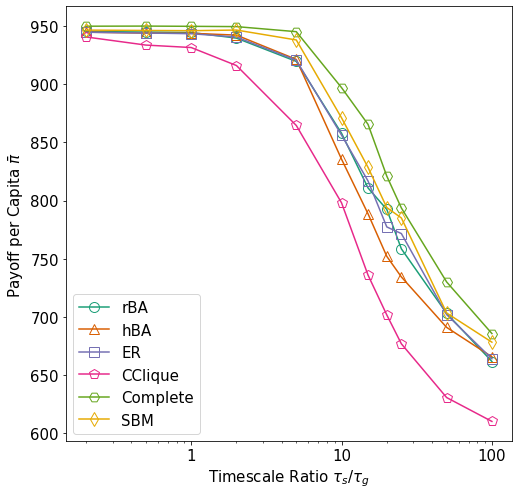

In [4]:
# plt.style.use('default')
c=sns.color_palette('Dark2',6)
marker=['o','^','s','p','H','d','*']
fig = plt.figure(figsize=(8,8))
for j in range(len(names)):
    plt.plot([float(S) for S in s],payoff_tmeans[j],color=c[j],
             marker=marker[j],label=labels[j],markerfacecolor="None",ms=10)
#     plt.fill_between([float(S) for S in s],
#                      np.array(payoff_tmeans[j])-np.array(payoff_tstd[j]),
#                      np.array(payoff_tmeans[j])+np.array(payoff_tstd[j]),
#                     color=c[j],alpha=0.1)
    
#     plt.errorbar([float(S) for S in s],payoff_tmeans[j],yerr=payoff_tstd[j],color=c[j],
#              marker=marker[j],label=names[j],markerfacecolor="None",ms=8)
# plt.plot([0.2,100],[15/20]*2,'k-.')
plt.legend()
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
# plt.yscale('log')
plt.xlabel(r"Timescale Ratio $\tau_s/\tau_g$")

plt.ylabel(r"Payoff per Capita $\bar{\pi}$")
# plt.ylabel(r"Fraction of Cooperators $C/N$")

# fig.text(0.2,0.3,'Fixed\n Network',horizontalalignment='center')
# plt.arrow(0.4,150,-0.2,0,width=0.005,head_width=20,color='red',head_length=0.03)
# fig.text(0.8,0.3,'Fixed\n Strategy',horizontalalignment='center')
# plt.arrow(38,150,40,0,width=0.005,head_width=20,color='red',head_length=10)
fig.savefig('Data/'+imitate+'/Final Mean Payoff vs ratio.pdf')#,bbox_inches='tight')

# double plot for im2

In [11]:
N = 20
T = int(N*(N-1)/2)
s = ['0.2','0.5','1','2','5','10','15','20','25','50','100']
names = ['Random BA','Highest BA','ER','C-Clique','Complete','SBM']
labels= ['rBA','hBA','ER','CClique','Complete','SBM']
# payoff_tmeans = [[pd.read_csv('Data/Imitate/'+names[j]+'/'+s[i]+'.csv',header=None).to_numpy()[:,:int(T)].mean() 
#                   for i in range(len(s))] for j in range(len(names))]

extra = ''#'v0208_'
period = 5*T#list(range(4*T,5*T+1))#range(5*T+1)#
imitate = 'Imitate2'

payoff_1 = [[pd.read_csv('Data/'+imitate+'/Experiment 2/'+names[j]+'/payoff_'+s[i]+'.csv',header=None).to_numpy()[:,period].mean() 
                  for i in range(len(s))] for j in range(len(names))]
payoff_2 = [[pd.read_csv('Data/'+imitate+'/Experiment 2/'+names[j]+'/payoff_v0208_'+s[i]+'.csv',header=None).to_numpy()[:,period].mean() 
                  for i in range(len(s))] for j in range(len(names))]

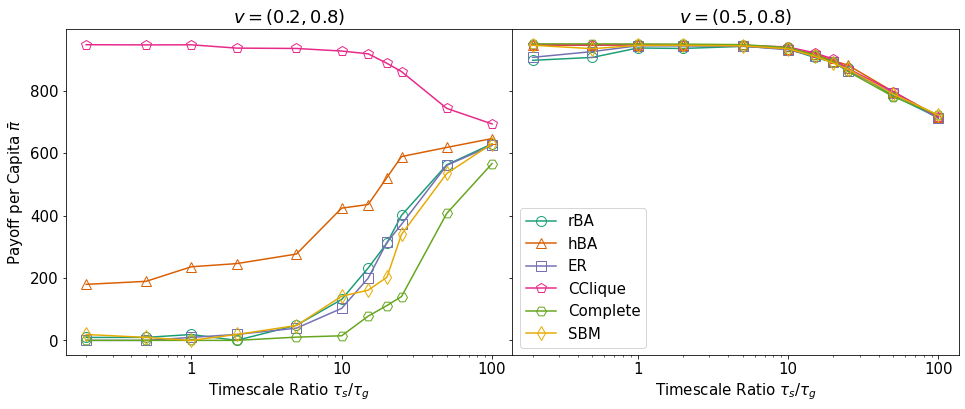

In [25]:
# plt.style.use('default')
p=[payoff_2,payoff_1]
titles=[r'$v=(0.2,0.8)$',r'$v=(0.5,0.8)$']
c=sns.color_palette('Dark2',6)
marker=['o','^','s','p','H','d','*']
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,6),sharey=True)
for i in range(2):
    for j in range(len(names)):
        axs[i].plot([float(S) for S in s],p[i][j],color=c[j],
                 marker=marker[j],label=labels[j],markerfacecolor="None",ms=10)
    #     plt.fill_between([float(S) for S in s],
    #                      np.array(payoff_tmeans[j])-np.array(payoff_tstd[j]),
    #                      np.array(payoff_tmeans[j])+np.array(payoff_tstd[j]),
    #                     color=c[j],alpha=0.1)

    #     plt.errorbar([float(S) for S in s],payoff_tmeans[j],yerr=payoff_tstd[j],color=c[j],
    #              marker=marker[j],label=names[j],markerfacecolor="None",ms=8)
    # plt.plot([0.2,100],[15/20]*2,'k-.')
    axs[i].set_xscale('log')
    axs[i].xaxis.set_major_formatter(ScalarFormatter())
    # plt.yscale('log')
    axs[i].set_xlabel(r"Timescale Ratio $\tau_s/\tau_g$")
    axs[i].set_title(titles[i])

axs[1].legend()
axs[0].set_ylabel(r"Payoff per Capita $\bar{\pi}$")
plt.subplots_adjust(wspace=0)
# plt.ylabel(r"Fraction of Cooperators $C/N$")

# fig.text(0.2,0.3,'Fixed\n Network',horizontalalignment='center')
# plt.arrow(0.4,150,-0.2,0,width=0.005,head_width=20,color='red',head_length=0.03)
# fig.text(0.8,0.3,'Fixed\n Strategy',horizontalalignment='center')
# plt.arrow(38,150,40,0,width=0.005,head_width=20,color='red',head_length=10)
# fig.savefig('Data/'+imitate+'/Experiment 2/'+extra+'Final Mean Payoff vs ratio.pdf')#,bbox_inches='tight')

fig.savefig('Data/Imitate2/Experiment 2/Final Payoff vs ratio Comparison.pdf')

Text(0.5, 0, 'Fraction of Cooperators $<C>_t$')

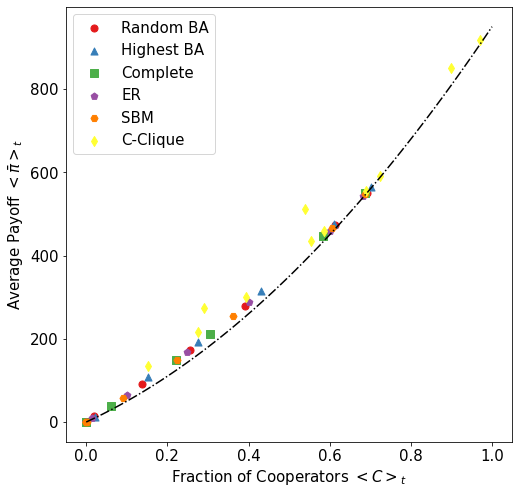

In [33]:
# plt.style.use('default')
c=sns.color_palette('Set1',len(names))
marker=['o','^','s','p','H','d','*']
fig = plt.figure(figsize=(8,8))
for j in range(len(names)):
    plt.scatter(cooperator_tmeans[j],payoff_tmeans[j],color=c[j],
             marker=marker[j],label=names[j],s=50)
plt.legend()

f_c = np.linspace(0,1)
f_p = 25*f_c*(f_c*N+N-2)
plt.plot(f_c,f_p,'k-.')
# plt.xscale('log')
# plt.gca().xaxis.set_major_formatter(ScalarFormatter())
# plt.yscale('log')
# plt.xlabel(r"Timescale Ratio $\tau_s/\tau_g$")

plt.ylabel(r"Average Payoff $<\bar{\pi}>_t$")
plt.xlabel(r"Fraction of Cooperators $<C>_t$")
# fig.savefig("Data/Imitate/Experiment 2/Fidata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgcAAAHvCAYAAADAXnxJAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAClMUlEQVR4nOzdd1yV5fvA8c/NHgICirhxb03Fbblzj7LSrNR2/RqWWt+yrGzqN0c72za+aVnurblyr7RUzC2KAxkiyob798d9QBBUQA4P43q/XrzwPM/9nOc6RJzr3OO6ldYaIYQQQoh0DlYHIIQQQoiiRZIDIYQQQmQhyYEQQgghspDkQAghhBBZSHIghBBCiCycrA6gqChXrpwOCgqyOgwhhBCiUOzcuTNCa10+p3OSHNgEBQWxY8cOq8MQQgghCoVS6sS1zsmwghBCCCGykORACCGEEFlIciCEEEKILCQ5EEIIIUQWkhwIIYQQIgtJDoQQQgiRhSxlFEKIYuLixYuEh4eTnJxsdSiiiHN2diYgIABvb+98XS/JgRBCFAMXL17k3LlzVK5cGXd3d5RSVockiiitNfHx8YSFhQHkK0GQYQUhhCgGwsPDqVy5Mh4eHpIYiOtSSuHh4UHlypUJDw/P13NIciCEEMVAcnIy7u7uVochihF3d/d8D0FJciCEEMWE9BiIvLiZ3xdJDuziLPC47bsQQghRvEhyYBcfYxKDj60ORAghhMgzSQ4K3B5gN/Ad8JftsRBCiDfeeAOlVMZXYGAg/fr14++//y7UOBYtWoRSiuPHjxfqfTObMWNGlp+Fq6sr9erV49133yU1NfW619x///12j0+WMhaoNGAK8BTgZ/s+FZMoSB4mhLBeyvHjXPpuBvHz5pMWFYWDnx/ugwZS5sGROAUF2f3+Pj4+LFu2DIDjx4/z2muv0aNHD0JCQvDz87P7/Yua1atX4+7uTkJCAn/++Sfjx48HYNy4cdnazpw5E4D58+cTHx9v1wmq8o5VoJYCCuhle9zb9n2ZNeEIIUQmCavXcL7/QJSbG+Xnz6XSsSOUnz8X5ebG+f4DSVi9xu4xODk50bZtW9q2bcvQoUP54YcfCA8Pz0gYSptWrVrRtm1bOnfuzPjx4xk8eDDz5s3L1i48PJw//viDbt26cenSJRYuXGjXuCQ5KDBxwKfAWK78WB2AMbbj8RbFJYQQpscgetRz+H33LT4vv4RTUBDKyQmnoCB8Xn4Jv+++JXrUc6QUcld7s2bNADh58mTGsc2bNzNgwAAqVqyIp6cnt9xyC//73/+yXJfexf7PP//Qo0cPPD09qV+/PnPmzMnSTmvNG2+8QUBAAF5eXgwfPpyLFy9miyMiIoIRI0bg7++Ph4cHnTt3ZseOHVnaBAUFMXbsWCZOnEjFihXx8fFhzJgxaK1ZsmQJjRo1wsvLi0GDBhEdHZ2vn4eXl1eOyw9nz55Namoqn3zyCZUrV87oRbAXSQ4KzA9AC6AJsAp4CwgFmgK32M4LIYQ1Ln03A49h9+Ia3DLH867BLfEYdi+XZnxfqHGFhoYCUKNGjYxjJ06coEOHDnzzzTcsXLiQwYMH8+CDD+b4hjhs2DAGDBjA3LlzqVOnDkOHDuXUqVMZ5z/66CPefPNNHnvsMX777Tfc3d158cUXsz3PoEGDWL58OZMnT+aXX34hLS2NLl26cPjw4SztZs2axbZt2/juu+948cUXmTp1KqNHj2b8+PG89dZbTJ8+nXXr1vHyyy/n6vWnpqaSkpLC5cuXWbp0Kb/++it33HFHtnYzZ86kefPm1K9fnyFDhrB06VJiYmJydY/8kDkHBWYe8L7t32cwQwwLgW5AR8zKhcctiUwIUTJdeO0Nkvfvy1XbpB07cW7ciPN33X3NNjohgeS9+0jeu/eGz+fcsBFl33wjl5FmlZKSApgk4Omnn+aWW25h4MCBGeeHDh16JSatue222zh16hRfffUV9957b5bnev7553nooYcAaNmyJRUqVGDRokU88cQTpKamMmnSJB5//HHefvttAHr27EmPHj0ySgsDLFu2jI0bN7J27Vo6deoEQNeuXQkKCuL999/niy++yGjr5ubG7NmzcXR0pFevXsyfP5+PP/6YQ4cOZSQ4e/bs4fvvv2f69Ok3/FmULVs2y+M777wz23yD0NBQNm3axMSJEwG49957mTp1KnPmzOHBBx+84T3yQ3oOCswg4Bfbvx8AFti+bwJeB9yRlQtCCMskJ4Or6/XbuLiYdnYUGRmJs7Mzzs7O1K5dm7/++os5c+bgmim26Ohonn32WapXr57R9ssvv+TgwYPZnu/222/P+Le/vz8BAQEZPQcnT57kzJkzWRIPMG/AmW3bto2AgICMxADA09OTfv36sWHDhixtO3fujKOjY8bj2rVrExQUlKXno3bt2pw/f56kpKQb/jzWr1/P9u3b2bx5M9988w1bt27l0UcfzdJm1qxZAAwZMgSA4OBgateubdehBek5KDDDgbuAvzFDCeWAZ4CWwMtADPAwZujhIaANZvKiEELkT14+uZ9p1hy/KZOvuyIh5fhxzg+6k/K/zb7p2K7Fx8eHVatWkZqayp49exg7dizDhg1j48aNODiYz6sjR45ky5YtjB8/noYNG+Lt7c3nn3/O/Pnzsz3f1Z+8XVxcSEhIAODsWVOILiAgIEubqx+fOXMm2zGAChUqEBUVdcP75XRMa01SUhIuLi45/yBsmjdvTpkyZQBo27YtZcuWZfDgwYwZM4bGjRsDZkihRYsW+Pj4cOHCBQAGDBjAhx9+yLlz56hQocJ175EfkhwUGA/M0sUpXFm6mAZMB/4DdAHmAj8BTwMNgAeBzkgHjhDC3twHDeTyzFn4vPzSNdtcnjkL90EDr3m+IDg5OREcHAxAmzZtcHd3Z/jw4cyePZshQ4aQkJDAokWL+PTTT3niiScyrktLS8vzvQIDAwGybT509eOKFSvmuEHRuXPnCn15ZYMGDQAICQmhcePGHDhwgN27dwPg6+ubrf3s2bN5+umnCzwOeVcqUL0BzZWli5mXNroDwzBzE14FYoEXgSHAIiClkGMVQpQmZR4cSdzPM0ncsTPH84k7dhL380zKjBxRqHHdf//9NGrUiEmTJpk4EhNJS0vLMswQGxvLggUL8vzcVatWJTAwMFuPw9UrGtq0aUN4eDjr16/POBYXF8fixYvp2LFjnu97M/ba5ntUrVoVML0Gjo6OLF68mDVr1mT5atq0qd2GFqTnoEClL10cB7TFLGGcSNYczAUzP6Ef8Aeml+EN4AvM0ER/wK2wAhZClBJOQUH4fvgBUQ8+hMewe/G8dyiOlSuTGhbG5ZmziPt5Jr4fflAohZAyU0oxbtw47rvvvox1/K1ateLNN9/E29sbBwcHJk6ciI+PT45LEK/H0dGRF198kbFjx1KuXDluvfVWfv/9d0JCQrK069mzJ+3bt2fIkCFMnDgRf39/Jk+eTHx8PC+88EJBvtxstm/fjru7OykpKYSEhPD6668THByc0bsyc+ZMevToQZ8+fbJdO2LECMaOHcuJEyeoXr16gcYlPQcFrhlm6eKDQHPM/IOcOAE9gZnANMwchUnAQOB74JK9AxVClDJuXbtQfuF8dGIi5wfdyeladTg/6E50YiLlF87HrWsXS+IaMmQIderU4b///S8AP//8MzVr1mT48OGMGjWKwYMHM3z48Hw993PPPce4ceOYPn06gwcP5tKlSxn3yWzevHn06NGD5557jrvvvhutNatXr6Z27do39dpupGvXrrRr147OnTvzzjvv0L9/fxYtWoSTkxM7d+7k0KFDPPDAAzlee++99+Lg4JAxYbEgKa11gT9pcRQcHKyvLniRf2cxKxQmAIG5vEYDOzE9CVsBL8yQw1CgbAHFJYQorkJCQjLGo4XIrev93iildmqtg3M6J8MKdhGIGSbICwUE2772ATOArzETGO8E7geyz6YVQgghCpoMKxRJjTAFlX4FumLqJwwE3gFOXuc6IYQQ4uZJclCk1QTeBOZgkoPFwGDgFeDwda4TQggh8k+Sg2KhMvASpurifcCfmLkIzwP/WBiXEEKIkkiSg2KlHDAKUxfhCUw1xgdt/96KmdQohBBC3BxJDoolb+ARzMZOzwMnMNUZRwBrMZUZhRBCiPyR5KBY88AMM8zHFF6KAcZihhyWIFUXhRBC5IckByWCC2a54+/A25hlka9hJi/+BiRaF5oQQohiR5KDEsUJs4/DTGAq4Isp3zwA+BG4bF1oQgghig1JDkokB+A2TLXF6UAt4EPMvg1fABcsi0wIUXq98cYblCtXLsdzI0eOzNhPAGDGjBkopbh0KW+l5K93j4L25ZdfMm/evFy1VUplfDk4OFCpUiWGDBnCsWPHcmx/+fJlPD098fDwIDY2tgCjzh1JDkq09KqLn2EqLrYAvsIkCR8A560KTAhhsYjYRJ77cQeRsUVz2LFv375s3rwZDw8Pq0O5prwkBwBjxoxh8+bNbNy4kcmTJ7Nr1y769u1LSkr2+WELFiwgLi6O+Pj4PN2joEhyUGo0BiYDs4DOmKGHAcC7wCnrwhJCWOKnDcfYHxbDjxtz/uRqtfLly9O2bVscHErO21RQUBBt27alXbt2DBs2jA8//JCQkBAOHjyYre3MmTOpWbMmNWrUsNu2zNdTcn7qIpdqA29hJi8OwCyHvBMYj1RdFKJ0iIhNZMmeMD4e0Yolu08Xyd6DnIYVQkND6d27N+7u7tSoUYMZM2Zw11130blz52zX//XXX7Rt2xYPDw+aN2/On3/+ma3N119/TaNGjXB1daV69erZdmvct28fvXr1ws/PD09PTxo0aMCnn34KQOfOndm5cyfff/99xnDBjBkz8vQavby8AEhOTs5yPDo6muXLlzNkyBCGDh3KypUriYiIyNNz3yxJDkqtKsDLXKm6uBazBHIMsNe6sIQQdvfThmP0aVaZehW96dOsUqH3HqSkpGT7utEOwVprBgwYQEhICN9++y1Tp07lo48+YuvWrdnaxsXFMWLECB5//HF+//13XF1dufPOO4mLi8to8/777/Pkk08yaNAgFi1axJNPPsn48eP55JNPMtr0798fR0dHfvrpJxYsWMAzzzyTMf7/2WefUb9+ffr06cPmzZvZvHkzffv2ve5rSEtLIyUlheTkZA4ePMjrr79OnTp1aNy4cZZ2v//+O0lJSQwdOpR7772XlJQUfvvttxv+XAuS7MpY6pXHVF0cgdnoaRawDmiNqb4YjJm7cD352aJaCHGzpi0N4eDZvE1WS05JI+T0RRpU8ubJ77ZlPN578gLOTrn/vFg30Ivne+d9C+nIyEicnZ1zPNeyZctrXrdkyRL27NnDtm3baNWqFQCtW7cmKCiIWrVqZWkbHx/PBx98QNeuXQGoWLEizZs3Z/369fTq1YuLFy8yYcIEXn31VV5//XUAevToQVxcHG+//TZPPvkk0dHRHDt2jPnz59OkSRMAunXrlnGPhg0b4unpmTH8kRujRo1i1KhRGY+rVKnCkiVLcHR0zNJu5syZNGjQgKZNmwLQqFEjZs6cyRNPPJGr+xQE6TkQNmWBxzDDDM8BR4EnMQnCOq5fdfFjTILwsV0jFELcvHMXE/Ar45KRCDg7OeBXxoVzFxMK5f4+Pj5s374921e/fv2ue9327dsJDAzMSAwAKleunGNC4eLikmWooWHDhgCcOmXmV23evJnLly9z9913Z+m96Nq1K+fOnePUqVP4+flRtWpVnnjiCX755RfCw8Nv+rW/8MILGa938eLFNGvWjD59+hAWFpbR5syZM6xdu5ahQ4dmHBs6dCh//vlnRvyFQXoOxFU8gfuBuzF7OPyAGWqohUkUupP112YPsBtTR+F+2+NmhReuEKVYXj+5R8QmMuzTDfz8VEfKebledXwjb9/VDP9Mx+3Byckpy5LFdP7+/pw5c+aa1509e5by5ctnO16+fPlsS/28vLyyTGR0cXEBICHBJEDp4/eNGjXK8V4nT56kevXqrFixgldeeYWHHnqI+Ph4OnTowEcffUTz5s1v8CpzVq1atSyvvVu3blSpUoVp06YxefJkAH799VfS0tLo1asXFy5cAKB3796MHz+eX375hTFjxuTr3nklPQfiGlwxFRZ/x0xg1MCrtmNzgCRMb8IUzL4OfrbvU5G9HYQomtLnGpS7KgEo5+VqydyDvAgMDOT8+ezLr3M6diN+fn4ALFq0KMdejGbNzAec+vXr8/vvv3PhwgVWrVpFQkICffv2JS2tYP7Gubq6UrNmTUJCQjKOpa9MaNOmDb6+vvj6+mYkFIW5akGSA3EDTkBvzFyEyZjhh3eBgZgVDhpTlRFbO4BlhRuiEOKG0lco3N+xRo7n7+9Yo8iuXABo1aoVZ8+eZdu2bRnHwsLC2LlzZ56fq127dri7u3P69GmCg4OzfaWvIkjn7OxM165dGT16NGfOnMn4RO/i4pLRG5EfCQkJHDlyhKpVqwJw9OhRtm7dyvPPP8+aNWuyfL344ovs3LmTQ4cO5ft+eSHDCiKXHDD1EToB24GvgeWYYYhvgCGY3SLHYFZBdAHcrQhUCJGDa/UapMvce/Bcr/qFHN2N9enTh2bNmnHPPffw3nvv4e7uzoQJE6hQoUKeayGULVuWN954g1GjRnHixAluu+020tLSOHjwIGvWrGHu3Ln8/fffjB07liFDhlCzZk2io6OZNGkSzZo1y+h5qF+/PsuXL2f58uX4+/tTo0YN/P39r3nf48ePs2XLFsD0eHz66afExMTw8MMPAzBr1iwcHBwYO3YslSpVynJtw4YNmTp1KjNnzuS1117L0+vND0kORB4pzEqGXZgNn1wwJZm3YhKGpsAtmLkKj1sTohAim/2nY/g79AKztpy4brum1coWTkB5pJRi/vz5PP744zz44INUqFCBV155hd9++y1fVRRffPFFKlWqxLRp05gyZQpubm7UrVuXIUOGAGYYo0KFCrzzzjucPn2asmXL0qVLFyZNmpTxHK+++iqhoaHcc889XLx4ke+++46RI0de855TpkxhypQpgJlj0aRJE1asWJExyXLmzJl069YtW2IAEBAQQI8ePQotOVA3WltaWgQHB+sdO3ZYHUYx0gt4H2iC6Tn4HFgMVAD+AV5AhheEKDghISE0aJD3pYMlWUxMDDVr1uTpp59mwoQJVodTJF3v90YptVNrnX12KNJzIPJtEPALJjnohkkO1mNWOcwC7rAsMiFEyTR9+nQcHByoU6cO58+fZ+rUqSQmJvLQQw9ZHVqJI8mByKfhwF3A35ihhGqYegh1MUsbX7UsMiFEyeTm5sakSZM4ceIESilat27NqlWrqF69utWhlTiSHIh88sAsXZyC2Rq6E/AzZjvop5DJiEKIgjZy5MjrjumLgiNLGcVN6I1ZyrgMkxykApe4srRRCCFEcSTJgbgJDpili58ClTErGSojv1ZCCFG8yV9xcZOaYZYuPgJUAvYBKVYGJIQQ4iZJciAKwDOY3RhHYoYV8l6xTAghRNEhyYEoAIGYQki9MXsyrLM2HCGEEDdFkgNRgNyANpjkQIprCSFEcSXJgShgnYBzwL9WByKEECKfJDkQBexWzKqF9VYHIoQown7//Xe6du1K2bJlcXV1pW7duowePZrTp09bHVqGkSNHZmyXnFvh4eG88cYbHD9+3D5BFRIpgiQKmB+mYuI64DGLYxFCpHtk+YOEx4ffsF2AewBf9/zOrrGMGTOGDz74gAcffJDnn38eb29v9u/fz/Tp0zl27Bhz58616/3tKTw8nAkTJtC5c2eCgoKsDiffJDkQdtAJ+Ag4i5msKISwWnh8OAsGLb5huwHz+to1joULFzJ16lS++eabLHsidOrUiccee4wVK1bY9f4id2RYQdhBJ9t3WbUghMhq2rRptGjRIsfNkhwdHenduzcAERERjBgxAn9/fzw8POjcuTNX75wbFBTE2LFjmThxIhUrVsTHx4cxY8agtWbJkiU0atQILy8vBg0aRHR0dMZ1a9euRSnFihUr6NevH56enlSrVo3p06ffMP7Q0FCGDh2Kn58fHh4e9OzZk3//NXOsjh8/TpMmTQDo0qULSimUUhnXRkVF8dhjj1GhQgXc3Nxo3749W7duzfsPsRBIciDsoDoQhCQHQojMkpOT2bRpE7163bjE+qBBg1i+fDmTJ0/ml19+IS0tjS5dunD48OEs7WbNmsW2bdv47rvvePHFF5k6dSqjR49m/PjxvPXWW0yfPp1169bx8ssvZ7vHww8/TNOmTZkzZw59+vThySefZNGiRdeMKSoqio4dO/Lvv/8yffp0fv31Vy5fvkz37t2Jj4+nYsWK/O9//wPg008/ZfPmzWzevBmAxMREunfvzqpVq3j//feZN28e5cuXp3v37pw9ezYvP8ZCIcMKwk46AT8BsYCXxbEIUTJ99feXHIs5muv24/58qcDa1fCpyaNN8zavKDIyksTERKpVq3bddsuWLWPjxo2sXbuWTp1MT2TXrl0JCgri/fff54svvsho6+bmxuzZs3F0dKRXr17Mnz+fjz/+mEOHDlGjRg0A9uzZw/fff5+tZ6B37968++67APTs2ZMjR47w9ttv069fvxzjmjZtGpcvX2b37t34+fkB0KFDB4KCgvj222956qmnaNq0KQANGzakbdu2Gdf+9NNP7N27l3379lGnTh0AunfvTr169ZgyZQrvv/9+rn+OhcHyngOl1FCl1C6l1CWlVJhS6gelVKWr2iil1Dil1EmlVLxSar1S6pYcnquhUuoPpVScUuq0UupNpZRjob0YkcltmI2YNlodiBCiiMnc1Z6Tbdu2ERAQkJEYAHh6etKvXz82bNiQpW3nzp1xdLzyZ7527doEBQVlJAbpx86fP09SUlKWa++4444sj++880527txJampqjnGtWrWKHj164O3tTUpKCikpKXh5edGyZctsQx45XduyZUtq1KiRcS2YuRY3utYKlvYcKKUGADMxO/e8AFQE3gYWK6Vaaq3TbE1fAsbb2hwARgOrlFKNtdZnbc/lC6wC9gMDgVqY/YQdgFcL7UUJm8aYlQvrkF0ahbCPvHxyHzCvL+/eOrHA2uWHv78/rq6uhIaGXrfdmTNnCAgIyHa8QoUKREVFZTlWtmzZLI9dXFxyPKa1JikpCRcXl4zjV98jICCAlJQUIiIiqFChQrb7R0REsGXLFn755Zds57p163bd15R+rbOzc7ZztWrVuu61VrB6WGEYsEtr/XT6AaXURWA+UA8IUUq5YZKD97TWn9jabAaOA09z5Y3/CcAduFNrfRFYqZTyBt5QSv3XdkwUGkdMzYNVQDKQ/X8IIUTp4uzsTIcOHVi+fDlvv/32NdtVrFiR8PDsyy7PnTuX0Z1fEK6+R3h4OE5OTpQrVy7H9n5+fgwYMIDx48dnO+fldf3hUz8/P4KDg/n888+znXN1dc1D1IXD6mEFZyDmqmMXbN/T+53aA97Ar+kNtNaXgYWYYv7pegPLr0oCZmEShk4IC3QCLiMbMQkh0j333HPs2LGD77//Ptu5tLQ0li1bRps2bQgPD2f9+ivF1OLi4li8eDEdO3YssFiurqcwd+5cWrZsmWWYIrNu3bqxb98+GjVqRHBwcJavevXqAWT0TCQkJGS79vDhw1SrVi3btekrHIoSq3sOvgXmKaWGA/Mwi+LfBlZrrffb2tTHDF4fuuraEGBIpsf1gdWZG2itQ5VScbZzCws8enEDrTH7LawD2t6grRCiNOjfvz+jR4/m4YcfZuPGjQwcOJAyZcpw4MABpk+fTlBQEHPnzqV9+/YMGTKEiRMn4u/vz+TJk4mPj+eFF14osFiWLl3KK6+8QqdOnZgzZw4rV65k/vz512w/evRofvrpJ7p27cozzzxD5cqVOXfuHOvWraNjx47ce++9VKtWDXd3d77//nt8fHxwdnYmODiY4cOHM336dDp37szYsWOpWbMmkZGRbNu2jcDAQJ5//vkCe10FwdLkQGu9WCk1EvgGSE8jNwEDMjXzBS5pra+eIRINeCilXLTWSbZ2F3K4TbTtXDZKqcewlfG70exZkR9umKRgPfAiVzqDhBCFLcA9IFcFjgLcs4/1F7QpU6bQvn17PvnkE4YNG0Z8fDxBQUEMGDCAsWPHAjBv3jzGjBnDc889R0JCAq1bt2b16tXUrl27wOL4+uuv+eCDD5g2bRp+fn58+umnDBgw4Jrty5Urx5YtW3jllVd4/vnnuXDhAhUrVqRjx44ZqxTc3Nz46quvmDBhAp06dSI5ORmtNW5ubqxZs4bXXnuN119/nXPnzhEQEEDr1q2ve0+rKK2t2z1PKdUFWAB8BiwFKgBvYErrdddapyqlXgFe0FqXveraR4CvAFetdZJSKtnW7oOr2p0CftBaj7teLMHBwboozhgt/hYCEzDLGutbHIsQxVdISAgNGjSwOowSYe3atXTp0oV//vmHxo0bWx2OXV3v90YptVNrnePmEVYPK0wBFmit/5N+QCm1G7MiYSAwB/PJv4xSyvGq3gNfIM7Wa4CtnU8O9/C1nROWuBUztWUdkhwIIUTxYPWExPrA7swHtNb/AvGYpYhgEgVH4Oq+pPq2c2Rql+XdRylVFfC4qp0oVGWBZki1RCGEKD6sTg5OAC0yH1BKNcCsMDhuO7QJuAjcnamNB9AfMxSRbinQUymVeT3JEEyiIe9MluoEHASKzlasQojSq3PnzmitS/yQws2wOjmYDgxRSk1RSnVXSt2HWbVwHFgCoLVOACYC45RSTymlugGzMbF/fNVzJQJzbM/1GGb+wlSpcWC122zf11+3lRBCiKLB6jkHHwFJwJOYIkYXgA3Ay7ZaBukmYpKBlwF/YAfQQ2t9Lr2B1jraljh8gpkFdwGYhkkQhKWqATUwHThDLY5FCCHEjVi9lFEDn9u+btTuHdvX9drtB7oWWICiAHUCfsSMEHlbHIsQQojrsXpYQZQanZCNmIQQoniQ5EAUkkaYESGZGyqEEEWdJAeikDhgJiZuwkwzEUIIUVRJciAKUScgDjOfVAhRGr3xxhsopXL8+umnnwCyHHN3d6dBgwZMmjSJlJQUi6MvPaxerSBKlVaYEhbrMZttCiGskJKUyp65+9i/9BCN+tSl6aCGOLnkvBOhPfj4+LBs2bJsxzPvmzBmzBjuuusu4uPjWbRoES+99BLJycm8+uqrhRZnaSbJgShErlzZiOk/yEZMQhS+0B1hbPxqO35BvvT4z63smRfC7GcW0uGxVlRrWblQYnBycqJt2+vv1BoUFJTRpkuXLuzbt48ffvhBkoNCIsmBKGSdgDWYHbcbWhyLEKVH7LlLbPpmB1GhMVkSgcAGAYTuDGPjVzsIWX6I9g8H41WhjMXRZtesWTPWrZMJzYVF5hyIQtaRKxsxCSEKy8JXV+JbtSx3f9QvWw9BtZaVufujfpSt6sPCV1cWSjwpKSnZvq4nNDSUGjVqFEpsQnoORKErC9yCSQ6etDQSIYq7jV/vIPJYVK7aJsUnc3RLKGcPhF+zTVx0PEnxySx4ZcUNn8+/hh8dHslxt98bioyMxNnZOdvxY8eOERQUBEBaWhopKSkZcw7mzJnD999/n6/7ibyT5EBY4DbgAyAMKJwxTiFKOzcfNxJiEvAo63bNNgkXE3Hzufb5guLj48OqVauyHa9UqVLGv0eNGsWoUaMyHj///PMMHSrl1wuLJAfCAp0xycE6YJilkQhRnOXlk3vi5SR+fmQuPcd1xtXT5Zrn73y/Fy4e2c8XJCcnJ4KDrx/7Cy+8wD333ENMTAwffPAB06ZNo3v37vTp08eusQlD5hwIC1QBaiLzDoQoPK6eLlRsFMCJ7adyPH9i2ykqNq5g98Qgt6pVq0ZwcDDdunVjzpw51KtXjxdeeAGz1Y6wN0kOhEU6AbuBGIvjEKL0qNmxOkc3huZ47ujGE9TsUK2QI8odZ2dn3nrrLfbv38/ChQutDqdUkGEFYZFOwHeYHbr7WhyLEKVD9VZV2PLtLr4Y+FO2c+4+bnR5vkOhxJGSksKWLVuyHa9atSqVK+c8D2nw4MHUr1+f999/nwEDBtg7xFJPkgNhkYZAOczQgiQHQhQGV08Xhv9wl9VhEBMTQ7t27bIdf+utt65Z5MjBwYGXX36ZESNGsGXLlhsWURI3R8n4jREcHKx37JCa/4XrXWApsApTPVEIcS0hISE0aNDA6jBEMXO93xul1E6tdY4zQ2XOgbBQJyAe2YhJCCGKFkkOhIVaAR7IqgUhhChaJDkQFnIB2mE2YkqzOBYhhBDpJDkQFrsNiAD2Wx2IEEIIG0kOhMU6Ao7I0IIQQhQdkhwIi/lwZSMmIYQQRYEkB6II6AQcBXIu6yqEEKJwSXIgioBOtu9rrQxCCCGEjSQHogioDNTGrFoQQghhNUkORBGRvhHTBWvDEEIIIcmBKCo6YWodbLA6ECGEHc2YMYOWLVvi5eWFr68vzZs3Z/To0VnaKKUyvhwcHKhUqRJDhgzh2LFjWdqNHDkSpRTdu3fPdp/4+Hi8vb1RSjFjxgx7vqQSSZIDUUQ0AAKQVQtC2FnsWdg3O/tX7Fm73/q9997jkUceoWfPnsyZM4cffviBgQMHsmDBgmxtx4wZw+bNm9m4cSOTJ09m165d9O3bl5SUlCztypQpw9q1azl37lyW44sWLUL2Dso/2ZVRFBEKUxBpMZCIbMQkhB1oDb8OBid3cPe9cjw+GrZ8CA/9CUrZ7faffPIJjz/+OO+++27Gsf79+/P6669naxsUFJSx82K7du0oW7Ysffv25eDBgzRs2DCjXb169YiNjWX27Nk8/fTTGcdnzZrFgAED+Pnnn+32ekoy6TkQRUj6RkzbrQ5EiJJp7yxISYAHVsA9s698PbAckuNg7y92vf2FCxcIDAzMdlzlIiHx8vICIDk5Odu5IUOGMGvWrIzHsbGxLFmyhKFDh95EtKWbJAeiCGkJeCJDC0LYQdJlWPki9PoQHK760+/gCL0/NOeT4uwWQosWLfj444/5/vvviYyMvG7btLQ0UlJSSE5O5uDBg7z++uvUqVOHxo0bZ2t77733smnTJkJDQwGYO3cuvr6+dOrUKVtbkTsyrCCKkMwbMb2M5K5C3MDS5+Ds7ty1vXAcUhJh9avXbpOSAJ82hLJBN36+wFug9we5u7fNp59+yqBBgzImEjZo0IDBgwczduxYvL29s7QdNWoUo0aNynhcpUoVlixZgqOjY7bnbdCgAU2aNOGXX37hhRdeYNasWdxzzz04XJ0EiVyTn5woYjoBkcA+qwMRomS5dAa8K1+/jXdl085OmjZtSkhICAsWLOD//u//0Frz1ltvERwczKVLl7K0feGFF9i+fTvbt29n8eLFNGvWjD59+hAWFpbjcw8dOpRZs2YRGRnJqlWrZEjhJknPgShiOnBlI6YmFsciRBGXl0/ua16HyINw18xrt5k9FOoNhC5v3Gxk1+Tq6kr//v3p378/AN988w2PPPII33zzTZaegmrVqhEcHJzxuFu3blSpUoVp06YxefLkbM87dOhQxo0bx3vvvUflypVp27ZttoRD5J70HIgixhtogcw7EKKAdXgRQjfAiT9zPn/iTzi5ybQrRA8//DB+fn4cOHDguu1cXV2pWbMmISEhOZ6vUaMGrVu3Ztq0aQwZMsQeoZYqkhyIIqgTcAwItToQIUoOF0/o8V9Y9hykpWU9l5YKS0eZ8y4edgshPDw827Hz588TExNDhQoVrnttQkICR44coWrVqtdsM2bMGPr378/w4cNvOtbSToYVRBHUCZiM6T14wOJYhChBGg+FbZ/Aj7dnr3Pg7AGN7fuJu0mTJgwcOJDbb7+dgIAATpw4weTJk/Hw8GDEiBFZ2h4/fpwtW7YAJoH49NNPiYmJ4eGHH77m899zzz3cc889dn0NpYUkB6IIqgjURZIDIQqYUnDP7xCaw9BCtVvtWgAJ4LXXXmP+/Pk8++yzREVFERgYSPv27fnll1+oUaNGlrZTpkxhypQpAPj7+9OkSRNWrFhBq1at7BqjMJSUlzSCg4P1jh07rA5DZPgC+AZYDvjeoK0QJV9ISAgNGjSwOgxRzFzv90YptVNrHZzTOZlzIIoo2YhJCCGsIsmBKKLqARWQVQtCCFH4JDkQRVT6RkxbgASLYxFCiNJFkgNRhHXCJAbbrA5ECCFKFUkORBEmGzEJIYQVJDkQRZgz0B74E0i1OBYhhCg9JDkQRVwnIArYa3UgQghRakhyIIq4zBsxCSGEKAySHIgizgsz90CSAyEK1lngcdt3IbKS5EAUA52AE8Bxi+MQoiT5GJMYfGzJ3X///Xe6du1K2bJlcXV1pW7duowePZrTp0/f9LXHjx9HKcWiRYsyrgkKCmLs2LF2ez0ljSQHohjoZPu+3tIohCg59gC7ge+Av2yPC8+YMWO45557qFmzJj/++CMrVqzg+eef548//uCpp56yy7Vz587l2WefLeiXUmLJxkuiGAjEVExcB8hWrELcnDRgCvAU4Gf7PhWTKNj/8+LChQuZOnUq33zzDQ899FDG8U6dOvHYY4+xYsUKu1zbvHnzgnkBpYT0HIhi4jbgb8zKBSFE/i3FVCDtZXvc2/Z9WaHcfdq0abRo0SLLm3s6R0dHevfuncNVN39tTsMKn332GVWrVsXT05P+/fuzcuVKlFKsXbsWyHl4AmDkyJEEB2fdr2jv3r307dsXLy8vvLy8uPvuuzl7tvjO55DkQBQTnQCNqXkghMifOOBTYCxX/vw7AGNsx+Ptevfk5GQ2bdpEr169bty4AK/Nyfz583nqqafo168fc+bMoUmTJjkmHblx+PBhOnToQEJCAj/99BMzZsxg37599O/fn+K687EMK4hioh5meGEdMNDiWIQoKqYA/+ah/WkgmZwnISYBdwOVcvlc9TBJRe5FRkaSmJhItWrV8nTdzV6bk3feeYdevXrx+eefA9CzZ0/Onz/P119/nefnmjBhAoGBgSxduhQXFxcAmjZtSv369VmyZAl9+/YtkJgLk/QciGIifSOmrchGTELkVyQQcI1zAbbz9qeUuu751NRUUlJSMr4yf/q+0bW5kZKSwq5duxg4MOsHjTvvvDNfz7dq1SruuOMOHBwcMmKuUaMGQUFB7Nix46bjtYL0HIhipBPwK2anxs7WhiJEkZC3T+4wHTgFvJ3DuVcwCfjjNxvUNfn7++Pq6kpoaOh123Xr1o11667UNlmzZg0dOnTI1bW5ERERQWpqKgEBWROlqx/n5fkmTZrEpEmTsp07efJkvp7TapIciGKkJVAGM7TQ2dpQhCiWhgN3YSb3Ns10PH1p46t2vbuzszMdOnRg+fLlvP12TgmK8cUXXxAbG5vxuF69erm+NjfKlSuHo6Mj4eHhWY5f/djNzQ2ApKSkLMejo6OzPPbz8+OOO+7gkUceyfFexZEMK4hixAlTTnkDshGTEPnhgVm6OAWzpBGyLm10t3sEzz33HDt27OD777/Pdi4tLY1ly5ZRr149goODM768vLxyfW1uODk50bx5c+bPn5/l+Jw5c7I8DggIwNnZmZCQkIxjly5dYtOmTVnadevWjX379tGyZcsscQcHBxMUFJSrmIoa6TkQxUwnYDnwD3CLtaEIUSz1Bn7BLF3sQ/aljfbVv39/Ro8ezcMPP8zGjRsZOHAgZcqU4cCBA0yfPp2goKBrrki4mWuvNm7cOO68806efPJJ7rjjDtatW5ctuXBwcGDgwIFMmzaN6tWrU7ZsWaZMmYK7e9Yk6o033qB169b07duXhx56iHLlyhEWFsbKlSsZOXIknTt3ztfPylJaa/nSmpYtW2pRHMRqrdtorT+wOhAhCtX+/fsL8Nl2a637aK0jtda9tdZ7CvC5c+e3337TnTt31t7e3trZ2VnXqVNHjxkzRp85c+amrz127JgG9MKFCzOuqV69uh4zZkyW5/n444915cqVtbu7u+7du7devny5BvSaNWsy2pw9e1YPGDBAe3l56WrVqukvvvhCjxgxQl/9nhESEqIHDx6sfX19tZubm65Vq5Z+7LHH9MmTJ2/ip3Tzrvd7A+zQ13hPVLqYrsEsaMHBwbq4ziotfZ7GLMmac6OGQpQYISEhNGjQoACf8RXMVuiNgXcK8HmLr71799KkSRPWrFlTPD/t5+B6vzdKqZ1a6+CczuVrzoFS6ohSant+rhXi5nUCQpGNmIS4Gc9gaoc8Y3UgogjKc3KglOoGVAdaKKWaFXxIQtzIrbbva60MQohiLhD4wvZdiKzyMyHxYWAlUBZ4FNPHK0QhCgTqY3ZpHGltKEKIEqNx48bFttxxQctTz4FSyhcYBHyL2cJrmFLK1Q5xCXEDnTArFgqnopsQQpQmeR1WuB+4DMwDZgGumIoaQhQy2YhJlD7yqVbkxc38vuQ1OXgE+Flrnay1voiZLp69JJQQdlcHqIiplihEyefs7Ex8vH13TRQlS3x8PM7Ozvm6NtfJgVIqGLPm5btMh2cAtymlauXr7kLkm8L0HmzD3tvMClEUBAQEEBYWRlxcnPQgiOvSWhMXF0dYWFi+94vIy4TER4DdWuvdmQL4QykVipmkOC5fEQiRb50wo1tbgC4WxyKEfXl7ewNw+vRpkpOTLY5GFHXOzs5UqFAh4/cmr3KVHCil3IGh5Lwrx/fAY0qpV7XWaTmcF8JOmgNemKEFSQ5Eyeft7Z3vP/ZC5EVuew68gVHkXJLuM+CYrc2FgglLiNxwAjpiJiWmIFuFCCFEwcjVnAOt9Tmt9fda69gczoXbzl0o8OiEuKFOQAxmC1ohhBAFQbZsFsVcO8AZUxBJCCFEQbA8OVBKOSmlXlJKHVJKJSqlTimlpl3VRimlximlTiql4pVS65VSt+TwXA2VUn8opeKUUqeVUm8qpRwL7cUIC3gCwZh5BzKDWwghCkJeljJWs1MMM4BngcnA7cBLZF+b9hIwHpgE9AcuAauUUhlFwW3VG1dh3iEGAm8CY4AJdopbFBmdgJOYqS9CCCFuVl5mcB1TSrXRWhfYvsZKqV7AEKCZ1nr/Ndq4YZKD97TWn9iObcZsyfc0V1ZQPAG4A3faCjStVEp5A28opf5rOyZKpNuAiZjeg5oWxyKEEPZwFngd83nX/ptlXbPnwNaV/1qmT+cKmKuUWqyUmqSUekAp1Vwp5aqUclRK/ZWP+z8ErL5WYmDTHrMS4tf0A1rry8BCoHemdr2B5VclAbMwCUOnfMQmio0AoCFSLVEIUXJ9jEkQPi6Uu11vWMEBk6ZUynRsOWZvhYGYSok7MF38keTvI1sb4KBS6hOl1EXbXIE5SqnM96wPpAKHrro2xHYuc7sDmRtorUOBuKvaiRLpNmAvEGF1IEIIUcD2ALsxb7t/2R7b143mHKirHn+ptb5Ha10fKAO0xlROfB8zPJBXgZg9d2/BFFl6EGiJ6aFIv7cvcElrnXrVtdGAh1LKJVO7CzncI9p2Lhul1GNKqR1KqR3nz5/PR/ii6Ohs+y6rFoQQJUkaMAV4CvCzfZ9qO24/+a4ao7VOAHbavvJL2b4Gaq0jAZRSZzD9w12BP27iuW9Ia/0l8CVAcHCwTHUv1moBlTG/OndaHIsQQhSUpZi3yV62x70xo+zLgD52u+v1eg40cAJIzHTsPqVUf6VUQc36igb+SU8MbDYASZhB5PQ2ZXJYkugLxGmtkzK188nhHr62c6JEU5ihhe2YkSQhhCju4oBPgbFcebt2wCzE+xR7bjp3zeRAa52mta6htd6X6fD9wHzgkFIqVim1TSn1nVJqjFKqZz7uH0L2oQtsx9L7TA4AjkDtq9pcPcfgAFfNLVBKVQU8rmonSqxOmLxys9WBCCFEAfgBaIEZgf8FM8ceoClmNP4Hu905L0WQ/sB09ftiPqKNxWyHVx14EViSj/svApoopcplOnYbpuRd+oyLTcBF4O70BkopD0y9g6WZrlsK9FRKeWU6NgSTWsk09lLhFszCFvnPLYQo7s4AMzFz8XtjpvatzXR+KDDXbnfP9ZwDrXWPTA832r4yKKXK5+P+X2IKIC1USr2L2WJvErBKa73Bdt8EpdREYLxSKhrTCzAak9hkXtMx3fZcc5RSkzCrJ94ApkqNg9LCCeiA+dWUjZiEEMXNSczn8NVA+gr/cEwZn25AjUxtZwF32C2SAvvrqbXO83R/rfVFpVRX4CPMK03CDFs8f1XTiZhk4GXAH7OEsofW+lym54pWSnUDPsHUQLgATMMkCKLU6ITpRNqDWfgihBBF2TGuJAQHbccaAs9g9o55DrMwMHNikL608VXsRWktk/TBrFbYsaPAij8Ky1wGumNGoUZbHIsQQlxNA4e5khActR1viukd6ApUzNR+MWZ1wneYz8hpmAoAQ7nZ1QpKqZ1a6+Cczkm/qyhhPIFWmHkHz5PzfFchhChMGjP/fjUmKTiJeaNvDrwAdMFUes1Jb8xkxPSli1cvbbQPSQ5ECdQJeA84QvZFLkIIURjSMFVb03sIzmAW3gUDD2AKt/nl4nnSly6OA9piljCmj7TbjyQHogS6DZMcrEOSAyFE4UnFzAVYDazBTCZ0wrypP4r521Q2H8/bjITkplxKGIaXW3NcnZsWTLjXkavUQylVUymVopS6PYdz9ymlEvO5WkEIOygPNEKWNAoh7C8F2Aq8ixkCeByYh5lU+BawCvgAGED+EgPjfxv6cirKm5829r2paHMrV8mB1voopmj9wzmcHgkszs9qBSHspxNmKZD8WgohrnYW8yZ+Np/XJ2OK+b4J9MTsd7AUs0LqPWAlMBmTLJS52WCJiE3kl62JuLt8zS9bkoiMTbzxRTcpL4MW3wADlFJl0w8opaphplZ+VcBxCXGT0nfplt4DIcTV8rP9cQKmCNF4oAdmieEfQHtMIrASkxj0wBTmLTg/bThGn2aVqVfRmz7NKvHjxmMF+vw5yUty8Bum2uB9mY6NAE5hplEKUYTUBKoguzQKIbLKy/bH8ZhhgZcxb/pjMUV7u2CGClZihg46A252iTYiNpEle8KoX8mbFf+c4f6ONViy+7Tdew9ynRxorROBn4GHMh0eCczQUixBFDkK03uwHVP7QAghcrP98SXM590XMDVTXsLU3euFqbG3HHgd6Ai42D3inzYco04Fb96c+w+/bjmBn6dLofQe5HW1wjfAk0qpJpifbHXg2wKPSogCcRvwP8xGTN0tjkUIYb1rbX88B3DFrDLYgplTUA4YiBk5b45Zhlh4Hln+IOHx4eaBL5TzNWsfBi240mb1PAhwD+Drnt8V+P3zlBxorf9SSv2FmZjoA6zWWp8o8KiEKBDNML+m65DkQIjSLn3740mYTvNormxkNNH2PRBTXbUb0AR71xK4nvD4cBz3P0tiYhSPOWyi7631cSrnT1pUJAkbNvHVv+VJvbUv6wI+sMv981Pn4BvMIIsrOa9eEKKIcMJ0/f2JbMQkRGmXvv1xNUz11I2Y4YQqmH0LmmL2KrC+qmp4TAIAZxLSmO/xLhUqVoCIsxBh+i88q0bzpOc++h69FY9rFVa8SflJi/6HmYoZjz33ixSiQHTC7Pi92+I4hBDWmgfcjilGtAUzn/5nzNvYa5hkwfrE4N8zF3n4qy0APOWwlAq+LqQMXcpOPZ4flwxlF6+RMmQJru4OPOu+2m5x5PmjlG0nxTuARK11sh1iEqIAtcVMGlqHKVsqhCidOmNKEDtiljBm/ntg3+2Pc+vPf8N57be/8XZ3xiU1hdv1TF49NAaf+2dzoUwqIVVSCVkUwh+z/yGm+t087TmNH9Ja2CWWfPWzaq2XF3QgQtiHB2a703WYXRqt/2QghChsIZhlh4mYXoLMiYH9tz++Ea01v24J5cPlB6hb0ZvJw1qw9ttTpDk0oVFsPQIqbyWi1m90StZ0nXCA07vD2fjVDrRXY4acPGmXmGQQVpQCnTDVzA4DdSyORQhRuLZjNi7yAYZjSvb05cr2x+lLG90tiS4lNY0Plh3gt20n6VQ/gDcGN8HdxYle58M46vIA1WM/wrnOPrpFnie+wWCclCPVWlamUpNADnxyit7nX7FLXJIciFLgVkyPwTokORCiNPkD0yNQFVOjoJztWOFuf3wtlxNSePW3PWw+FMF97YN4qkddHBwUWmt2JrWkfuyHlGt8kQqX4ols9QbJNZ7E3cFMFXRycaRy5DfsSA6msx1is26dhhCFphzQGCmlLERpMhdT2bABpsJ/AFe2P/4UiLJ9H4MVb4XnYuJ57NutbDsSyX/6NeSZnvVwcFCkXbxI9JP/xxFfRUDZs3inphAa/D0LfqrP+s+2otNMzcGk5V/jmnqEOQE17RKf9ByIUqIT5pPDOaCCxbEIIexHY0ojf4bZ9+C/ZC1t3Ay4BXgQU9zI/tsfXy0kLIaxP+8iITmNqfe1oE3tcgAk7dlD1JNPEtfoEA8lRnAhKQCHy6ms+ErjX8WF28fdSmroCS7//DPu4e+wNfZBTrWQOQdC3IT05GA9psiJEKLkSQOmATMx1Q9fJ+e3uWds554pvNBs1oWc47Xf/8bX04WPhgdTq4IXWmsuf/Mtse+/ifPAi9T0uMBK3xr8u3kMd1X5kO5NJnDWL55/fjG9Bp4uyZTx82Z9SmX8fOxTHl6SA1FKBGHGHdchyYEQJVEKMAEzj+BeTKGjaw0XBAJfFFJchtaanzed4JOV/9Kgkg/v39scfy9X0qKjiR49htSdiyk79DJODvH8XrkPSTsfxTnhEtuSx9N/pCu1VNaVVqvnOHDvXc2p21mGFYS4CekbMc3CbKxy83usCyGKigTMBkkbgCcx+wMWnWXLKalpTFkSwtwdp+jSsAKv39EENxdHErdvJ/r/nsbF6yj+gy8Q7eTEPL9HUSs74+SaTK9XO7Puoy18+UpCtud093Gjw+gqdov5usmBUupb4C2t9TGl1G3ALq31JbtFI4RddQJ+wmzE1MPiWIQQBeMi8BzwD2YC4mBLo7napYRkXvl1D1uPRDK8Yw2e6FYHhSb240+4OPl9ynZLwrNaBP94+LEuZRTOy2pSvo4Pt//nNsqU92T4D3dZEveNeg5GANOBY8AaoB2wzd5BCWEfTYGymKEFSQ6EKP7OA08DocB7FLUN1k5HxzP2512ciLjMuAGNGNCyCqnnzxM16jmSt60h4D6Ns8tZFvjV4vix53E96kO9brXo+ERrnFwKdxfIq90oOTgDdFZK7cf00bgppTyu1VhrHVeQwQlRsBwxNQ/WAqcw+4dNwIw/CiGKl1BMYnAB+BBTCbXo2HfqAmN//ovk1DQ+eKAlrWr6k7hhI1HPPIuTyzkqjEhAc5mPfdvhsOMR3C660uGJVjTsVQelrB8SudHizi8xe1nGYNaHrAFir/MlRBHXCfOr+jZwFlNjXQhRvBwAHsFswzydopYYrN53lv/7bjvuLo589Ugbgqv5cPH9yUQMHYpn/UuU63uOOHcX3vYYgPPaJ/DS3vR/uweNetctEokB3KDnQGv9plJqMaaKxA+Yv6hHCiMwIeyjDeAM7APmA/djaqs3szIoIUSu7cTsk1IGU8QoyNJoMtNa8+OGY3y26hBNqpZl0tBb8ImNImLISJK2b6Hc8LK4uuzjTEAzPj/Vhcr/tKR8XX96vtQJT/9rdspbIrcTEn9SSr0FzNZa/1M4oQlhD662L0fAF1NTfSqmaIoUDBWiaFuL2VmxMqZuSdEpaJaSmsakRftZuCuM7o0DeXVQY1i/jvDnnkc5xBL4lBuO8fvYW2cA8za2p3JYZerfXouOj7XG0dna+QU5udFfwxFAedu/q2PVzhRCFJilgDdmpOwgplAKmFrrQoiiaz7wIlAXUw656CQGsfHJPPfjThbuCmPkbTWZMLABiRPfI3L4CFzrOlNhaAwOqeH80eBpViztRbkzlej4ZCs6PdWuSCYGkLcJiSATEkWxFofphhyHKZCyDqiHqa3+MtAFyX+FKIq+x8wPaosph1x0uuBPR8cx+n+7OBUVx/g7GtPTP43IO+8i+a9d+D1YHzfnteBVh1897yPi1yp4uDsw8N3bqdig6CQ3OZEJiaIU+QFoAXQEmnBlI6ammFrrP1gTlhDiGjRmJcLHwO2Y0shFJzH45+QFHv5qK1GXEvnwgWC6nv6b8J69ST12kAov1sLd6Q90vQF8e/lpLswLwqmS4oEP7yryiQHIhERRqswD3rf9uzPwEaaERw1gKPAC8LgVgQkhsknBvOUswpQ8f4GiNC9o5d4zvDV3LwHerky+qxllP59G1HczcGtTG79OZ1HRf5LUYQLfLKmCw1EXHNqk8uDY+3ByKR6FiW8YpdZ6J7BTKdUN+E5rfcz+YQlhD4OAXzC9Bv0xS6B+Bl7BlFW+w7LIhBCZJWCG+v4EHgMepaiUQ9ZaM2P9Ub5YfZhm1cryTjt/0h66j8t791L20c54uC1CxSuiu81i1tfx6IvgOlgz4oHhRWaZYm7kOoXRWj8IoJSqhKmU6IfZEHuz1vq0fcIToiANB+4C/sYMJfQFlmB6EXYDr1oVmBAiQyxmqeJu4D8UpY3SklPSeG/hPpbsPk3PphV5niPEDRoBzk4EvNkN55M/gE9TjlSfxsoPTpHokkj5//Pivh73Wh16nuU6OVBKOWDWjjyKWQeWLlUp9SXwjNY6rYDjE6IAeWCWLk7BLF28F5iL6bp8BpmMKITVIoBngaPAO5h5BkVDTFwSL/2ym7+OR/Nwx+oMXv4Nl2fOwrXtLfj1S8bhxPfoxsPYHPU4/3wRSlSF89R9ohp3tbBmb4SblZfBjzcxW12Nw/TNnsOsJRliOxcJvFbQAQpRsHpjfn2XAX2A2sBxoKuFMQkhTEnzpzAd0h9gViYUDScjLzPmf7s4cyGeV9uVo9W7TxF/6BA+T9+Dp+ciVOgRkjpPZunKRpzdG8qxBv/S7qGWDKw7yOrQ8y0vszuGA69qrd/XWodqrRNt398HxgMj7RKhEAXKAbN08VPMH6EIzMSnVVYGJUQpdxB4GLOd+ucUpcRg94loHvl6KzFxyfy38kVaPDWUtKgoyn/wGGX0l6jEC1zoPpdffwzizIFwdt+6mU6PtyvWiQHkLTkIwAzW5uRv23khioFmmKWLD2LKKdfETEzUFsYkRGn1F2bSoRPwNdDY2nAyWf73aZ75fjvero5MOb2caq89j0twCyq8dRsue8dD+UYcafw7s6fFEpMUw8beK7nz7oH0rtHH6tBvWl6Sg4OY9V45GQr8e/PhCFFYnsHsxvgMMAzz673D0oiEKH3WY3ZW9Ae+wSwrtp7Wmq/XHOb13/+hka8z7859G9+5s/Ae+3/4943GYddHpDV/lI1pU1g1/TiXK8awru8SHur5ID2qF515EjcjL3MO3gZmKaWqAb9h5hwEYKaSduHaiYMQRVAg8IXt370xwww/A60si0iI0mUh5m2lHqbmSFlLo0mXlJLGu/P3suzvM/TwjOPhD57BtawP/t+8hcv+1+HEaRK7f8qyxbU5u/8Y0S3D2dpkLWNav0DHyrdaHX6ByctSxl+VUheACZiSVc5AMmaLrF5a65V2iVAIu3PFLHH8CjM5McjKYIQoBX7EvI20xhQm87Q2HJuYuCT+M2s3u09E80DMXgZ+/QFu3brh90Q7HFY/Ae5+RHVbwJKvL5MQG8np3kf4p+Iu/tPqZdpWamd1+AUqT6WatNYrgBW2ZY3lgAhZvihKhruAGZhiSC9ZG4oQJZbGlEL+AeiOWejmYmlE6UIjLjP6f7sIvxDHmN2/0X73KrxffZkyQf+iVjwB1W/jUMAk1k45iruvKwfv+osj7gd5ufUrtApsbXX4BS7Xcw6UUv1tSQFa6zStdbgkBqLk8McMLyzEbCUihChYKcBbmMRgMKaOgTWJQURsIs/9uIPI2EQAdh2P4uGvthAbHcvrC//Lref2UX7mV3i5/YLa+hFprZ9lQ/y7rP7yMOUb+rF90DqOuh/i1bavlcjEAPLWczAPOKeU+hGYobUOsU9IQlhlGLAAmINZySCEKBiJmDLlazF19B7DinLIKcePc+m7GXxxOJW9VZszfdk86tUO5ANVh8DEGF6eO5GgW1vhO+ZuHBaPgPhoEnp+y7J5lTh34Bh1+9fg12o/EJF4ntfavUHT8s0K/TUUlrysVqiFGZS9B9irlNqslHpUKeVtn9CEKGy1MUsbf8VMpxFC3LxLmFVBa4GxmM3NCj8xSFi9hvP9BxLlWoa1DW/j46c6s6LebUymDg3CQnjntwnUe2kUfo+3wGF2X3B0JaLbYmZ/4U3ksShaP9uUmdW/Iyopkgnt3yrRiQHkITnQWh/XWr+uta4B9AAOY/bPPKOU+lEp1cVeQQpReIYB5wGZXyvEzYvE9BLswaxMsGZRW8rx40SPeg6/775lQfN+9LqlMj9vDiUxVVM1OozX9vyKl6vGw3kpatETENSFA7VnMXfyGZxcHbl1Qis+Tf2A2MSLvNn+bRr6N7LkdRSmfO0dqbVeDay2bcI0C7gPGKaUOoGZbfKx1jql4MIUorC0w6xW+BkzB6H47KImRNEShqlhcB7zObK9ZZFc+m4GHsPu5VKVcsQu+4ZyHo5ExiTx8rFd/F29KZ7fvIP3nOE4HPqFtA4v8+e/fTnw20GqtqhEwydq8ubu10lMSeStju9Qu2wdy15HYcpXcqCU6oQZlB2M6X/9FDMnoSdmqWMrzEcwIYoZB8yv7rvALqClteEIUeSdBV7H/OkPtB07jEkMkoDPMLugWid+3nzKz5tD+E93MNjBgTMx7vSJDKVys4q0TV2Ez+9TcXBy5ezmBmy+fBvhB4/R/K7GBA7w5bXNr5KSlsLbHd+lhk9NS19HYcrLaoXqSqnXlFJHgNVAVUx/UUWt9TNa6z+01i8CI4CB9glXiMLQB/DB9B4IIa7vY0yC8LHt8W7MpEOFmaZmbWIAkBYVRdy5tVy6fInHEiew5EgPAofPxqn9UALiDpCKIrzWcyzTzxAVeoEe/7mNCgPL8sqmcaTpNN7tOLFUJQaQtwmJRzH/xX8Gamutu2mtZ2qtE69qtw/YVlABClH43DB1D9YDJy2ORYiibA8mGfgOs0fCj5idFX0x5ZBrWRZZZo7lfWDVS3zp/H+UiYujL3D61zGw/Hl03f4scX0Hj3+m4+oQxx3v90I3TGbchpdxUo68d+t/qeZd3eqXUOjyMqzQD1h+o9oGWuuDmHLKQhRjdwPfAzOBFy2ORYiiKA2YgkkG/ICOmKqH9TC9CH7WhXYVl/7l2Jbsx/GLNbnr0ElatPwfPuoQBx0eZsOCriTHp3G8dl16NF9ChFc/Xt84Hg8nD97u+B4VPStaHb4l8rJaYakUPRKlRzmgF6Yo0kWLYxGiKFqKGTrohelQnoMpgzyYopQYADg7/s3hsG7cdjyS3vXWUFYdJLH7V+yNuZPk+DRc3BwIOdcBV5e/GL/xFbycvXjv1v+W2sQA8jasgFJqiFJqlVIqVCkVfvWXvYIUwhrDgHhgrtWBCFHExGHmoY8BPgemYjqMp2KGE+KtC+0qqWmavWc70dJvOb81DiCtzCYOp9Zi+jRXwo5G80cNb76u60etKuvZG94ePzc/3r11EgEeAVaHbqm8TEgchulnPQxUwZSSW2R7jovAJ/YIUAjr1MUsvPkVU/pVCGH8ADTGzDX4DrgDmIhZ3XOL7XzR8NvWUNbQklqeu3m64iiqqjMcPNmHVM+LbBq4kITOX3BrvQnUcN/PGtrwTseJlHMvZ3XYlsvLnIMXMIWxJ2JWKXymtd6llPLCVIyJs0N8QlhsGPA8sArTfSqEgNm273GYqodDuFITZCjm7eJxC+LK6lRUHJ+tOkjDWmEc3d6Dux2WEKNrcjahPU98OgBP//9j55mt+P7Qk42XBnMy6Cx+bkVrSMQqeRlWqANs1FqnAqmAN4DWOhaYhFnUKkQJ0wGohhlT1RbHIoTVUjCTDWNs//4ekwxkLhY2C9OTYK20NM278/fipNM4VzWMOM/yqNQkUuKTGdxuBp5/jCDyh644/dwP5eTJ+ZM9OVf1lNVhFxl5SQ4uYja+B1P6qkGmcwqzrZ0QJUx6UaT9mGVbQpRWp4CHMAlBf8ADSLiqTfrSxuGFGllO5u08xa7j0Tx4cCVpzom0rLKEqIQqHOI+vLo+yIGKTfk27SJ7qrUmvv7PVGpSkRQXGT5Ml5fkYDtXqlksAF6zbbw0Angf2FLQwQlRNPTFdJT9z+pAhLCTs5hhgLPXOL8EUyX/JGZk+XVMZ/EUzJJGyLq00d2ewd7QmQvxfLLiX1qWSaXzml+4LfoMniqM7acHU+vRsfzpW4GXorYRUbMLdw2aTehfadTsUM3SmIuavMw5eA9IrwTxmu3fn2MSjO0UhQEmIezCHbM8awbm01MVS6MRouBlrnL4TqbjlzGjxkuA5phpZ+klknsDvwDLMFVFMy9ttI7WmokL9qG15rHFH+PSsAH3nt5CZHxVTsa34vjYpQD0ZggAPzIHdx83ujzfQfZbyyTXyYHWegu23gGt9QVgoFLKFXDVWstCcFHC3Y2Zgf0LZvmWECVF+lDAj8D9tsfNMMVuXwFOY+agP0TWtwwHzP8L44C2mKWNE8njCvkCt3j3abYeieQZ3wuUO7QXn8nDcf13JWtjH+eBGXcz6/jPzD30O9N7fElgKa5jcCM3TA6UUu6YtDAIOAP8obU+B2ArnXx1+WQhSqAA4HZgPqaTrIy14QhRIK6ucvgUV2oWfA6UB77ELE/MSTPbuQcxPQvW7qMQfjGBD5Yd4JYq3nT+6D+4dmiHPjGTyPiqVBnyJGmuqSw7voS2ldpJYnAD103xlFI1MenjbMy8gp+Af5VStxdCbEIUMfdhlm7NszgOIQrK1UMBrYDjmLI1nTGrdG65wXM8gxlqeMYeAeaa1ppJC/eTnJrGqKjtEBWJ+11NcEs4xprEztS6rQarQ//gcvJlBtYaZGmsxcGN+n/+i0ktb8VMTW2E2V3jCzvHJUQRVB9ogVmqJbOaRXGXXuVwLOatYANmZU4S4IWZdOidi+cJxLwlBN6ooV0t/+cMGw+e57HWFfH56hPc+/eBkK+JSqjC77ckoNEsODKfur71qO/X4MZPWMrdaFihHTBGa73R9jhEKfW47XtFrfUZ+4YnRFEzDPPHdA3Qw+JYhLgZP2CS3SbA18B0TFXQd2yPf6S4zDOPvJTI1CUHaFzFh15rfiYhOZnUDtXxPBLK2Zrv41lxH4Pm9wfgzGUYOL9fjs8T4F66SyZndqPkoCJmq+bMjmD6oQIxcxCEKEVuxaxW+BlJDkTxNg8zWhyHKYHcCXgXU86m6FQ5zI0pi0NISE7lpZZlSXjrZ1yHDcP5wOdcUNUIGjmKr12cGffnS5yLO8uXPb7B0cHR6pCLvNxMK5WycEJkcATuBf4B/rY4FiFuxiDM6ptNmHnl93Klzl3RqHKYG6v3nWX1/nM80rkWfl9+iHJ15UJFN3ycT5HabhyOLs4cvnCIvZH/0L/WQEkMcik3ycHyq3ZeTO8t+EN2ZRSlU3/MmOzPVgcixE0YDuzCbLVclisTD4tOlcMbuXA5ifcXh1C/kjd3ecYQv3ARafc/jv+ZL7nkEIR/70cBmH94Hu5O7vSoLnPpc+tGwwoTCiUKIYoVD8ynqp8wa8ArWRuOEPnigRk2eAfoh3k7KDpVDnNj6tIDxCYk89EDLbn87KMof3/OJEUQ7BZGYs8fwMGBiPgINoT9Sb+a/fF09rQ65GLjusmB1lqSAyFydA+mnPIvmF0bhSiOymISgvRVCUWjymFurD8Qzop/zvBI51pU/XcXkZs2EfXoBGrGv0aCVy3cWg0DYPHRhWit6VdzgMURFy/WlrISotgKBLpjJnVdsjYUIfJtLeAGrACiMEsbx1DU3xpi45P576L91K5QhuEdg7j4znukVq9N1Lm9+LmH4dL7TXBwJD4lnmXHl9KuUnsqeFawOuxipWj/BghRpA3D1J5fYHUgQuRDCrAeUw2xOUWlymFufLj8X6IvJ/HqoMakLFxI8v79HOn4KE28Z5PiUweHJmbfhD9CV5miR7WLx+TKokSSAyHyrRFmEtcsINXaUITIs11ADNCVolLlMDe2HI5g0V9h3N8hiHr+blz87/vENr6N5HNb8HM/hVO3N8DBkVSdyoIj86nvV5/6fvWtDrvYkeRAiJsyDDMpca3FcQiRV6sxQwrtKCpVDm/kckIK7y3YR1B5Tx7qVIvLP/5E8skw/qnaj1aV56P96kJj02uw/cw2zl4+w8Ba0muQH5IcCHFTOgGVkWWNonhJw1T5bI9JEIqHT1YeJPxiAq8ObIxz/GViP/iQU22H4ZO0BV+XUFTn18BWx2DekbkEeFSgbcV21gZdTOU5OVBKNVRKPaCUGqeUCrQdq62U8rrZYJRSlZVSl5RSWilVJtNxZbvfSaVUvFJqvVLqlmvE9odSKk4pdVop9aZSSipeCDtyxFST2wPstTgWIXLrbyASM6RQPOw8FsncHScZ2rY6jauW5dL0L7h8KZX9Do1oW3MR2r8uNB4KwKHog+yP3Ef/mgOk6FE+5To5UEqVUUr9iikN9zXwFlcWeL+L2aXjZr1PzlO/XwLGA5MwFWguAavSkxNbfL7AKkxFx4HAm5hpt7IcU9jZAMAT6T0QxccawBnoaHUguRKflMK78/dRxc+Dx7vWIfXcOS59+RUH2jxGNa9deHMUddv4jF6D+Ufm4eHkIUWPbkJeeg6mYvqgumPKw6lM55ZwkwtjlVK32Z5j8lXH3TDJwXta60+01quAuzFJwNOZmj6Bqdpxp9Z6pdZ6OiYxGK2Uys3WYkLkkyemKNIfwFmLYxHiRjRmvkFroMwN2hYN0/84RFh0PK8MbISbiyOx0z7grFsQYQm+dKi7BPzqZPQanI87z4awP7k9qCcezh4WR1585SU5uBP4j9Z6DdmnZp8Aquc3CFvX/8eYT/sRV51uj6nQ8Wv6Aa31ZWAh0DtTu97Acq31xUzHZmEShk75jU2I3BmC+aP7i9WBCHED/2Kq4BePIYU9odH8ujWUu1pXpXmQH8lHjnJx5m/srz+URjUP4JHwL3QaD46mpt+iowsBpOjRTcpLcuCOGaTKiRc3t5brCcyOH5/mcK6+7bkPXXU8xHYuc7sDmRtorUMxW47JOhZhZxWBbsBczK+cEEXVH5i5MkX/M1NCcirvzNtLBR83/q97XQAuTvovhyp343KyM22qLQS/2tD4XgDikuNYcXwZHSp1JMBDtl++GXlJDrZz7Z047sJs7ZVnSil/zPyF0Vrr5Bya+AKXtNZXJx/RgIdSyiVTuws5XB9tO5fTvR9TSu1QSu04f/58fsIXIpNhmOkwUhRJFGVrgBaY0slF29drDhMaGce4AY3xcHUi6a+/OP/Hdo4GdKB9x9M4x+yF217N6DX4I3QVl1MuM7D2IGsDLwHykhyMB+5USq0CHsH0ofZRSv2ImQOQ3wmJ7wBbtNZL8nl9vmmtv9RaB2utg8uXL1/YtxclThNMdTkpiiSKqqPAcUxVxKJt36kL/LzpOANaVKZ1LX+01lx4+z321roLZw9nGnnMAt9a0OQ+AFvRo3k08GtIXd96Fkdf/OU6OdBa/4npN3UFPsFMSJwA1AS6a6235/XmSqlGwEPAm0qpskqpspitwgB8lFLumE/+ZXJYkugLxGmtk2yPowGfHG7jazsnRCEYBpwC/rQ6ECFysNr2vWgnB0kpabwzfx/+Xq4829O80SeuXcvRQ4lEulel24ALOJzfnaXXYOuZLZyLOye9BgXkRls2Z6G13gjcanvT9gUuaK1vZoC1DmY9zeYczp0CvsGsD3MEamNm0qS7eo7BAa6aW6CUqopJNrLMRRDCfjpj5h/8bPu3EEXJakzvVtHuKZ2x/ghHwy8x9b4WlHFzRqelcf6dKYRUH0iFun5UiZlmeg2a3p9xzfzD86jgUYE2FdtaGHnJka8KiVrreK316ZtMDAA2YFLYzF+TbOf6YOoebAIuYoYuAFBKeWDqHSzN9FxLgZ5XFWMaAsQD624yTiFyyQnza7cLM2dWiKLiFHCQor5K4eCZi3z/5zH6NKtE+7omiYmfO4+9cTVJdnSn64AY1JldcNsrGb0G/0YdICRqPwNqDcJR6t4ViFz3HNjqEFxLGuYN/F+tdWJun1NrHcFVRemVUkG2f/6ptb5kOzYRGK+Uisb0AozGJDYfZ7p0OvAsMEcpNQkz3PEGMPWq5Y1C2Nkg4EtM78Fb1oYiRIY1tu9Fd0ghJTWNt+ftxcfDmVG9zHCCTkzk+LQfCS0/mKb96+G9/0koWyNLr8GCI/PxdPKkW7XuVoVe4uRlWGEtZhJiOnXVY4AEpdTXmJUHBTkjayImGXgZ8Ad2AD201ufSG2ito5VS3TDzIRZiVi5MwyQIQhSiMpginb9idrmTJVWiKFgD1MPsBVI0/bDhGAfPxjJx6C34eJiFaLEzfmS3e3s8yjjSqs1p+G0nDPgGHJ0BCI8LZ+PpDQysdYcUPSpAeRlW6A6EYj6h9wGCbd+/AE4C9wDvAY9iihnli9Z6htZapfca2I5prfU7WusqWmt3rfWtWuu/crh2v9a6q61NRa31+AJOUoTIpaGY3PnXGzUUohCEY/ZTKLq9BkfDL/HtuiN0bxxI5wYVAEi7eJE9P2wm1qMiHZ/ugNOmt02vQbMHMq5bdNQsHe5Xs78lcZdUeek5eBr4Xmv9xlXHlyul3gBGaq37K6WcgJHAKwUSoRDFUmXMhMQ5wMOYGmJCWGWt7Xs3K4O4JjOc8A9lXJ0Y06dBxvFzH3zFv74dqFrPiyD/f+D0DhjwdUavgSl6tJyOlW+lvEfRnmRZ3OSl5+B2zATCnGzkSkq6HjNdW4hSbhhmKs4iqwMRpd5qIAioYXEcOZu1+QT7wy4ypk8DfD3NcELquXNsXRMNTo7cOqYrat2bUDYIml2pxbfyxAriUuIYWOsOiyIvufKSHERhtp/LyQDbeTBLB2NuJighSoZmQCNgJmbOrhBWuIBZPVM0VymciLjMl2sO06l+AN0bZ2y0S8iEbzjnXZ8W/WvhdXEDhG2DW8dl9BqkpqWy8OgCGvo3oo5vHavCL7HyMqzwX+Aj22qChcB5zGLZgZi5B8/Y2nXBlFoWopRTmN6DVzCdbtdb8COEvazFJKdFLzlIS9O8M38vbs4OvNCvIUqZzX7j9h1k1zFvvL0SaTa8HczoAD7VodmIjGu3nNlMeNw5Hmn8qFXhl2i5Tg601p8opcIwKwY+wxQmSgX+AgZrrefamr4HJOX8LEKUNt2AjzDLGiU5EFZYA1TCrFQoWmZvC+Xv0Au8dkdjynm5Zhzf+vbvxLtUpdtzrXE8vhLCtkK/L8DJJaPN/CNzCfSsSKuKra0IvcTLUxEkrfVcrXVrwA0zr8BNa906U2KA1jpC6goIkS69KNIOshb4FKIwXAK2Yjp0lcWxZBUWFcfnqw7Rrk45ejerlHH87NLNHLpUiZqB8VRuVwfWTQCfanDLyIw2B6JCOBB1gAG1BkrRIzvJb4XEVK31OVkmKERu3IFZrfCz1YGIUmcDkEJRG1JIS9O8u2AfDg7wUv8rwwlpqWls+GIbzjqJDm/cCUdWwqktZq5B5l6Dw/PwdJaiR/aUp+RAKTVEKbVKKRWqlAq/+steQQpRvHlh5uwuByIsjkWULn8A5TA7hhYd83eeYuexKJ69vR4VfK4s89336RIitT8tgl3wCPSDtW+Ad1W45cGMNucun2Pz6U30CuqNu5MsEbaXXCcHSqlhwPfAYaAKZtP6RbbnuIipTCiEyNG9mCk6UhRJFJYEzNY0XchnJ7FdnL0Qz8cr/yW4ph8DW1bJOB4fHcf2VWfxTzpNk5eGwtFVcGpztl6DRUcXoJSirxQ9squ8/Ma8gCkU/5Tt8Wda64cwC2cjgJvdhEmIEqwK0An4HfNHWwh72wQkUpSqImqtmbhwH1rDuAGNMoYTADa+NZ8U7Uz7IbVxcHWx9RpUgeZXeg0uJ19mxQlT9KicezkLXkHpkZfkoA6w0TbPIBXwBtBax2J2Uny64MMToiQZhikBstjqQESpsAbwAVpYHUiGxbtPs+VwJP/XvQ6VfK/sg3B610mOHEmldtoBKg4fBEf/gJOboOPL4HRlFcPKEyuIT4lnYO1BhR98KZOX5OAikP5fKQxokOmcwmyIJIS4puaY/22kKJKwtyRMsdrbyFs5G/s5fzGBD5cd4JbqvgxuVS3jeGpyKuunrME9MZpWo3uZ3oR1E8CrMrR4+Eq7tFQWHplPY/8m1C4rRY/sLS/JwXagqe3fC4DXlFKPKqVGAO8DWwo6OCFKlvSiSMcxXb5C2Mt24DJFZS8FrTWTFu0nKSWNcQMb4eBwZThhz6+7ibnkQHPvI3h16wTHVkPoBrg1a6/B5jObOB9/XnoNCklekoP3MLsyArwGbAM+B77DzDl4vGBDE6Ik6o7ZwlmWNQp7Wg14AkWjQNDKvWfZ8O95Hutah2r+nhnHL567xK7f9hEYvZd64x8GrWGtrdeg+ZVeA6018w7PoaJnJVoFFo3XVNLlKjlQSjljKiL+CaC1vqC1Hoj57SurtW6jtT5qvzCFKCmcMbubbwMOWRyLKJlSgHVAR8DlBm3tL/JSIlOWhNCoig9D21XPOK61ZsPHGyA5hZYNknBp0gSOr4XQP6HjS+DsltH2QFQIB6MPMrDWQBxU0Vl5UZLl9qeciklF62c+qLVOlGqIQuTVHZgio9J7IOxhN2azpaKxSmHqkhDiElN4dWBjHDMNJxzfcpKT/0RQ7+xqAseNMgfXvgFelaDFI1meY/6ReZRxLkNXKXpUaHKVHGit0zAfcwJv1FYIcSM+QH9gGVIUSRS81Zi54x2sDoTV+8/yx75zPNy5NjUCymQcT4pLZuPnW/CKP0OjXjVxql4djq2FE+uz9RqcvXyGLac306tGH9yc3HK4i7CHvPTPvIKZhFi0Sm0JUSwNBZIxdQ+EKChpmCWM7TElu60TE5fE+4tCqFfRm/s7BGU5t3PW31yOSaLpuWX4PPesObj2DShTEVpk3WVx4ZGFOCgH+tboVziBCyBva1xexSxX3G3bnfEcoDM3sG3KJIS4oerArcBsYARmmEGIm7UPOE9RGFKYtvQAF+OT+Wh4S5wcr3wOjTgaxT8LQqh2fivVRvbHsVw5OL4OTqyDXh9m6TW4lHSJVaEruLXKbfi7y2r5wpSX5GCv7UsIUSDuA57ADC8MsjYUUUKsxvxZv9XSKDb8G86yv8/wcKda1An0zjiu0zR/Tt+Gi06kYfwOyjw20ZxYOwHKBELLrL0GK08sJz4lngG1BhVi9ALykBxorR+8cSshRO61BOpiJiYOpKhtqSuKG41JDlpjNvuyRmx8MpMW7qdWQBlG3lYzy7mQlYcJ/zeCW47Ox3/M4zh4esLx9XB8DfScBs5XhkJS0lJYeHQhTco1pVbZWoX9Mkq9PK8JUUo1VEo9oJQap5QKtB2rrZSy7rdRiGIpvSjSUaSGmLh5BzHFa63dnvmjFf8SdTmJVwc1xtnpyltM/IUEtn6/i3KpZ6jmHYXnsGHmxDpbr0Fw1lI5m05vJCL+PINq31GY4QubvOzKWEYp9StmaOFrzCZMlWyn3wVeL/jwhCjpemK21JVljeJmrcH8Se9kWQRbD0ewcFcY97UPokFlnyznNn+3k5T4ZBqHzMTnxRdRLi5w4k9TEbHDi1l6DUzRo7lULlOZlhWCC/tlCPLWczAVMwW2G6bPKnMf6BKgVwHGJUQp4QzcDWwGjlgciyjeVmP27/C15O6XE1N4b8E+qpfz5OHOWYcBwv4+y6G1x6gdsx3fuoG497etPFg7ATwrQMusvQYhUfs5fOEQA2oNkqJHFsnLT/1O4D9a6zWYokiZncBMvxZC5NlgzLr0mVYHIoqt45jhqcJfpRARm8hzP+5gypIQzl1M4JWBjXB1dsw4n5qcyobp2yjjkUatgwvwHjcO5eAAJzbAsT9Mr4GLR5bnnHd4Ll7OXnStau0QSWmWl+TAHYi8xjkvsicMQohcKQv0xXTARVkbiiimVtu+F35y8NOGY/wdeoElu08zpG11mlbL2nOxZ+5+LoRdpNHh3/C4rT1ut3Y0J9ZNAM8ACH4iS/szl8+w9cwWetXojasUPbJMXndlHH6Nc3ch28wJcROGYbbZlaJIIj/WAI2BCoV614jYRBbvDsPT1QkHBXe3rpblfMyZWHb9+g9V/eIof/ovvMe9bE6EboKjq3LsNVh4ZD6OypE+UvTIUnlJDsYDdyqlVgGPYNbN9FFK/YgZNJUJiULkWxCm3O1sINHaUEQxcxoIwYpVCj9tOEbFsu6cj02kc4MKzN4WmnFOa83GL7fj4Kiot2k67ncMwqVxY3Ny3QTwKJ+t1+BSUiyrTqzk1iqdpOiRxXKdHGit/8RMRnQFPsFMSJwA1AS6a6232yVCIUqNYZhhheVWByKKhbPA48B82+PCTQ4iYhNZ+FcYB8/GMrhVVUb3acCS3aeJjDXJ7dFNoZzcdZpG3idxS7yA9wtjzYUnN8ORFdDhBXDxzPKcy08sJyE1gYG1BhbqaxHZ5WkaqNZ6o9b6VsAbqAJ4aa07aK032iU6IUqV1kBtzLJGfYO2QnyMSRB+xxTTqlKod/9pwzFq2jZTeqhzLcp5udKnWSV+3HiMpLgkNn21A//KHlRa9jmewx8wmyuBWaHgUQ5a/V+W50tJS2HRkQU0LdeMmlL0yHJ5qXPQVSmlALTW8Vrr01rrOPuFJkRpk14U6TCwzeJYRNG2B7M18xTM9swNCvXuEbGJLNkThtaauoFe+JdxBeD+jjVYsvs0f363i7gL8TS7vAFHDze8Rtk2Vzq5BY4sh/bZew02hm0gMiGSgbUHFeprETnLS8/BKiBMKfWRUqq9vQISonTrhdnfTIoiiWtJwyQFT2ESBDAbLqUVWgQ/bThGj8YVOXDmIm1ql8s4Xs7Llb6VfDi08jD1W/risWo2ZZ54HEd/2/yBdTn3GpiiR3OoXKaKFD0qIvKSHDTBVEa8HdiglDqhlHpfKdXSPqEJURq5YBb/bASOWRyLKJqWYnqZemGWMFbFTAVbVih3T+81aFTFh5RUTZtaVyYOpqWmUXHXWRKdHCj392wcypenzGO2zZRObYXDy6D9WHAtk+U590Xu40jMEQZK0aMiIy8TEvdprV/TWtcHWmA+2twBbFdKHVZKvW2vIIUoXQZjkgQpiiSuFgd8CowFLgI7ge7AGNvxeLtH8NOGY/RpVpn9YRdxdXbIUtcgZPkhoo9FoxuVYW6qP17PjTKbK4GZa+DuD62eyvac8w/PxcvFmy5Vrd9qWhh52bI5g9Z6N6Y/62WlVD/gC+Bl4NUCi0yIUssP6AMsBv4PUyRJCIAfMJ/NmgALMbXnugANgVts5x+/1sUFYv/pGP4OvZDx+La3VgLgnpzGnSFRnC/jzArtQoOqDfC8z7a50qltcHgpdHsvW6/B6UthbDu7lbvrDpGiR0VIvvpvlFK+SqlHlFIrgTlAGWSQVIgCdC+m3oEURRKZzQOGAJeAbzBDCumTEYcCc+0ewZcPt2HOc7cBMKp7HT5tWJGnTlzi/y6l4uYAT3aB3795lE+7VUA5O5uL1k0Adz9onb3XYMGRBTg6ONK3Zl+7xy5yLy+rFbyVUiOUUksw62c+BKIxv5EVtNYP2ClGIUqhWkA74FdM5UQhAAYBs4D3MMWPXufKHnizMCO99rftSARVLiaS/P0eIo5G0+zOhkSduICzqxPhM37HuVlT3PvZ3uzDtsOhJba5Bl5ZnudSUix/hK6kU5XO+Lr5FUrsInfyMqxwHjMddjkwEligtb5sj6CEEGCWNT4DrACklKwAU8G+LxALPIEZSoArSxvtP7Ibe+4Sx77bRfuIeDq90JHKTSsy+9lFeFf04pbA8+yIbE9Yg2rcej4OrwplYN2btl6Dp7M91/Ljy0hMTWRArUF2j1vkTV6GFR4DArXWg7TWM69ODJRSzgUbmhClXVtMAVIpiiTSncNMOvQERtiOZV7a6G73CBa8upITaWnE392Q6sFV2P37Xi6eiaXDA43wmf0Bt/vvwv+WGix8dSWE7YCDi6Dd6Gy9BslpySw8upBm5W+hhk8Nu8ct8iYvqxW+11rHZD6mjG5Kqa8xv7VCiAKTXhTpIGZWuijdEoCXMFO8KgMrbcczL220P+cKZQh3cqB1/fLEhl/ir9/2Ufu2IHzW/4a+EIPvuP/gW8UHvyBf02vg5gutn8n2PBvDNhCVEMmg2oUzFCLyJr8TEtsqpT4EwjB9ngORdVdC2EEvwBf4n+1xej39s5ZFJKwyDTgCvAn8B7N0Mcr2fQz5/HOeZzGVy1AjJpHmTpfZ//pXpKWkUfWzp7n0yac41q6FQxlPjm48QYOmF+HgQtNr4Oad5Tm01sw/PJeqXlVpHtCiUOIWeZOXCYlNlFLvKqWOYiq0PIbZH3Q0UFFrnX0aqhDiJrlhiiL9CZzgSj39j60MShS6VZiVKw8A7YFmmPkGDwLNgaaFFslOpal0KZm4e+7l3GUvfALcKTeoOzg54dq+PacH3M3pPaepGvOV6TVok73XYF/kXo7EHGGAFD0qsq77X0UpVVMp9YpSai9mtssYTJ3O4UAdTF/WX1rrFHsHKkTpdRfgjNkMdTfwHfAXZhKaKPnCgLeBRpi6F+meAQJt3wvHpYRk/jkbi9YxxDzzHuHxnlSu50P8r7PxHDEC3/fe5dJzk6iZtA6Hw4ug3fPg5pPteeYdnou3izedpehRkXWj1QqHMTOhtmL6Mn/XWkcDKKWy/xcXQtiBP9ATUxTpP5giSU8BUzGJgnzyKrlSgFcwf4bfxSSJ6QIx9ecKz85jUaRqqB7kyOFDKaQmpeK7ZwXKwwOvUSZJCT2taNd4C2m44dDm2WzPEXYpjO1ntzGk3lBcHV0LNX6RezdKDk4A1YHGQGfgjFJqufQUCFHYqmHeIGJtj3tjaiAsw1RTFCXTZ8BeYCJmEqK1th6JxC05kdse7spvb+4AYOPFplC/KTy0FIBK5c/gU+UfYkMC8cqh12Dhkfk4OjjSu4YUPSrKrpscaK1rKKXaYqZM3237Hq2UmoOZIivrq4SwuzjgN0yJ3F+B+zGfIMdgqpZ3oTCWsInCthlTDvlOzP4J1tt2JILGZw7gXb8PXgEHcIk5S6v171Jx9y4cfG17LMy6E33Mh9idznhddX1sUiyrQlfRuUoXfN18sz2/KDpu2B+ptd6itX4Wk7bejqnfORjz1wrgUaWU7LEphN2k19N/HFOL7CNMXt6UK/X0RckSAbyGqZQ52uJYjFNRcZyKiqd59HFi/jlC9MkYyp35C9cO7a8kBmf3wIG56PojUWXKZXuOZceXkpSayMDagwo3eJFnealzkKa1XqW1fhizSuEOzMeYO4CtSqkQO8UoRCk3D1NPv73t+0xM9XJNYdXTF4UpFRiP6TF6D7NixXpbD0cA0KZZNY7+sByAcse24t4n07DWujfB1YfYEB/cBw3Mcn1yWjKLjy6keUALqnsHFVbYIp/yNZNJa52stZ6vtb4XCMCsrzlUoJEJIWwGAb9gFgeNxYzw/YTpQSi8evqisMwAtgMvYCpkFg3bjkQSWNaNeiOHcOrv87g7JlEmKQK3Xj1Ng7N/Q8gcUqrdQ9zMeZQZOSLL9RtO/UlUQhQDpVRysZCvLZsz01rHYeq7yq6MQtjFcMxyxr8xQwkvYnoNfgQ8MJMSRcmwG/gSszpl4PWbFqKU1DR2HIuie+NAHKtVJ8KvPoGnt+MYGIi+dAnt44Ne+h8UrkRM2Yjvh5/gFBSUcb3WmnlH5lLVq5oUPSomZA2UEEWeB2bp4hRMHf30HgRfTNfzt8jc4JIgBrNsMRAz0VRdv3kh2hcWw+XEFNrU9if8YCTJSZqKCX/j0dSB2P/rQsyAABxOLCOZmpT7aQZuXbPWL/gn4m+OxRxlYK1BKFV0Xpe4NkkOhCgWemMSgPReguVAJcyQwgzMkjdJEIovDbwFRGLmGZSxNpyrbDsciYOC4Br+nPzrNIo0GrTejHdbJ3xHBlO2uycoJ1yql8dp8/Ogs/4uzj88Dx8XHyl6VIxIciBEseCAWbp4dT39lzEJwnfAdCRBKK5+BdZiqh02tDaUHGw9EkHDyj54uztzatdpmvqsxLGMK+rhddDpdYgNg1tfghGrITkO9v6Sce2p2FNsP7eNPjX74eLoYuGrEHkhyYEQxUZO9fQdMAnCQOAbzHi1KF4OAB8AHTGlZIqWi/HJ7A+LoU2tciRcTCTqaBi3VJxDctVHwMEB1r8FLl7Q9nlwcITeH8LKFyEpDoAFR+bj7OBM7xpSrKs4keRAiGIlp3r6Dpix6v7AV0iCUJxcBsYBZYE3KErzDNLtOBpJmobWtf05tfsMt5RfTMI5d1wGPQsR/8K+2dDmWfDwMxdUvxWqtoeN/+ViYgyrT/5Bl6pdKeta1tLXIfJGkgMhipX0evqBVx13wKyN749JDr4q5LhE/vwXOIXZWKmstaFcw9YjkXi6OtGosg8n/zpNA/81pMXWwalatSvDB62v2pS37SjY+WVG0aMBtYrOyguROze9lFEIUVQ4AK9i5h18gfkU+oilEYnrWYTZTOsxoKXFseRMa83WIxEE1/DD0UFxaucpKtGQmi0STYOQOVCtA3hVzHrhlg9JbfEwi48uokVAS6p5Vy/84MVNkZ4DIUoUR0wPQh/MBMVvrQ1HXMNxYBKmLPbD1oZyHScj4zh7IYE2tcsRdeICcTFJxPzjh5PzafhnFpzbAw3uzHrRiT/h5CbWB7UhOjGagbWlSFdxJD0HQpQ4jsDrmB6EzzCfAUZaGZDIIhEzz8AFM5zgaG0417H1iK1kci1/Tq49BkCAn0L1ngorxppG9TO9+aelwtJR6B6TmHt8GdW9q3NL+VsKOWpRECQ5EKJEcsRMcNPAJ5ghhhHXu0AUmg+Bg5gVCgHWhnIDW49EUsXPncp+HuzaegKv+LP49e4MjYfCwsfBpQysfOHKBfHR4OzB3xXqc/zITzzb/DkpelRMSXIgRImVOUH4GJMgDLcyIMEaTE2DYZili0VXckoau45F0atZJZLjkzl7MIqgmIO493keLp2FpFhoNAQaDs56YbVbmb/3c8q6lqVTlc6WxC5uniQHQpRoTsAETNnljzBDDPdbGlHpdQZ4E2hA1qWoRdM/py4Ql5RKm1r+nN57jrQ0CHS/iFOD+rBjumnU6TUIyFq06WRsKDvO7WBY/ftxdnS2IHJREGRCohAlnhOmNG93TFf2/yyNpnRKwdSiSMOURy76b5pbD0fi6KBoWcOP0M3HcExNonL3ZmaYIGQO+NeD8g2yXbfgyHxcHFyk6FExJ8mBEKWCE2byWzdgGjDT2nBKnS8wu2qOA6pYHEvubDsSQeMqPpRxc+bkthP4xx6lTL/eEBcFx9aYVQpXzSeISYxhTehqulTrio+rj0WRi4IgyYEQpYYT8A7QFbPD4yxrwymxzgKP274DbMVsjjUQsxVz0XfhchIHzlykTa1yXDwbS2wsVFDhODdrBgcXgk7NvoQRWHpsCUlpSVL0qASQ5ECIUsUJeBfoAkwGfrl+c5EPH2MSg48xuyy+BgQBL1znmqJl+7FItK1kcuhms4SxapvqV4YUvKtCpayFm5JSk1h8bBHBFYKp6lXNirBFAZLkQIhSJz1B6Ay8j5k9LwrGHmA3ZpfMv4DRwCXMPAM368LKo22HI/Fyc6JBJR9O/LEPj8Qoyt/ZHRIvweHlOQ4prD+1jpjEC1L0qISQ5ECIUskZ84Z1G6a+/2/WhlMipGGGa54C/DC7aO7DJAi1LYwrb7TWbDkSQaua/pCaxtlTiZRPOolrq1ZweCmkJmYbUtBaM//IXIK8a9C0XDOLIhcFSZYyClFqOWNK+L4ITMTUQRh83SvE9SzF/Ax7Af8AfwDeFKceA4Dj5y9z/mIirWv5c2ZPGCnaiaoNfVEODhAyh4tObgz/ayJpuyfleP3A+f0ACHAP4Oue3xVm6KIASXIgRKmWniD8B9OToIDsE83EjcQBn2J+lunbMAdili++iZkE6m5ZdHmRUTK5djmOTluMSkul6qCOkJIIBxez2bs88+5YkuWaNza9xrGYo3x9+3cZtQ0GzOtb6LGLgiPDCkKUei6YN7UOmLkI8yyNpnj6AbOJUkNMMhCO+Vm2AW6xnS8eth6JpHo5TyqWdefUvkj8Ek/j1bk9HP0DkmLZXLZClvahF0+wK3wnfWv2k6JHJYgkB0IITILwX6A9ph7CfGvDKXbmYXbCHIUpkfwM0Nh2bigw15qw8igpJY1dx6NoXcufy+diuJDsSaXKjignJ7NKwdWbv8v4Z7lmwZH5uDi60iuot0VRC3uQ5EAIYeOKWb2QniAssDacYqUjZu7GTuBVspaongUUjxn8f4dGk5icRpta/hyfvR6A6rc3hdQU+Hc+1O1HisOVXSQvJF5gzcnVdK3aDW8pelSiWJocKKXuVkotUEqFKaUuKaV2KqXuzaHdo0qpQ0qpBFubbjm0qayUmquUilVKRSilPlFKeRTOKxGipEhPENpgSi4vsjacYmEBsBhIAl4CBmU6l760sXhseLXlcAROjooWQaZkskvKZSoO6gyhGyAuItsqhd8O/kpqWioDaw+yJF5hP1b3HKQvAn4eGIDpj/tZKZWxK4ktWZiOGbTrjVkbtEgp1ThTG2dgOVAd04c3Crgb+LJwXoYQJYkrpkBSa8ymTZIg5CwJU3HyTaA5MBaYg1nSCFmXNhaPyYjbjkTSpGpZ3EjjbIwbgd7xOLi7mSEFJzeo3Suj7fm4cJYcW0y36t2pXKayhVELe7B6tUJ/rXVEpserlVKVMEnDx7ZjbwDfa63fAlBKrcP8n/gSV/ru7sJsdVZba33M1i4ZmKWUmqC1PmT3VyJEieKGeWMbjUkQHDBj6sI4i1nhsQ8YATyJ+RktApZhflaZlzYWfZGXEjl4NpYnutXhzIL1JDl6UK1tAKSlmeSgdi9w8cxo//OBn1EohtYbZmHUwl4s7Tm4KjFI9xdQCUApVROoS6YSblrrNGA2phchXW9ge3piYDMPk9oXj/8zhShy3ICpQDAmR19qaTRFxw7gAeA4ZhLnM5jPWQ7AGMySxijb9zFY30GbO9uPRgLQtrY/J5bvASBoSCc4vQNiw7IMKZyMDWVN6B/0qdGP8h7lLYlX2FdR/K1tBxy0/bu+7fuBq9qEAH5KqfKZ2mVpo7VOAo5keg4hRJ65YXZxbAG8jvlUXFpp4Efg/4CywPeY+gWZNcMsXXwQ08HZtPDCuwkRsYl8suIgXu5O1AnwJOxkMmWdLuEZ6Gt6DRycoG6/jPY/7f8RVydX7q57t4VRC3uyelghC9tEw0HAQ7ZDvrbvF65qGp3p/Hnb96vbpLfzzeF4+v0eAx4DqFZNNgoRImfpCcJzmE2EFMVld8GCcxkzt+APzLbXrwGe12j7DCaReuYa54ueHzccJTI2kar+HsRt3Ea0a0UaNXQHrSHkdwjqAu7mT6mvqy+bz2wC4P6l1x5SCHAPKJTYhX0UmeRAKRUE/AzM11rPKIx7aq2/xDZpMTg4WBfGPYUontyBDzBzfcdjEoTbrQyoEB3H7Kh4AvP678e8/msJBL6wf1gFJCI2kUV/nUYD5y8msm/O32gVQNCA1hC+D6IOQ7sxGe2reVcjLSaNL3p8jYezLAgrqYrEsIJSyg8zoHkCuC/TqfQegqsX0PpedT46hzbp7aJzOC6EyLP0BKEZJkFYZWk0hWM1ZsLhBeAzzFyD6yUGxc9PG45Rp0IZALo3DmTraVecSCGweTUzpICC+gMB2B3+F3vO7+HuekMkMSjhLE8ObLUIFmFKtPXTWsdlOp0+j+DqeQP1gSit9flM7bK0UUq5ADXJPl9BCJFvHsCHQBPMvgF/WBuO3aRgFky9CAQBP2EmZpYsEbGJLNkTRpqGGuU9GRkQT2paWfwru+Do5AAH5kLV9uBVEa01P+z/nvLu5ekdJCtXSjqriyA5YVYe1AF6aa3DM5/XWh/FTE68O9M1DrbHmadOLwVaKaWqZzo2ALNguzTPoBLCDtIThMaYDYZWWxtOgYsGnsVMOLwT+AqocN0riqufNhyjba1y/H3yAj0aVyRtyRo8UzQnqwdC1FE4uztjlcLm05s4fOEQwxrcL3solAJW9xx8hlkQ/Bbgr5Rqm+nL1dbmDeBBpdSrSqkuwLeYZGJipuf5DdNDMEcp1cdWOOkT4GepcSCEPXgCHwGNgJcx9ctKgn2YOQW7MZMOx2E6NUue9F6DiEtJeLs7c0+baoRuNqvB/4hP4fKe2aZhgztITUvlx5AfqOpVjc5Vu1gYtSgsVicH6TOaPgQ2X/VVEUBrPRN4AhiJ6QVoihl+2Jv+JFrrZEw9g5OYmgifAL9jW4kghLCH9AShIaYm2VpLo7l5c4FHMH8Wv8F0PpZcP204RnBNf3Ydj+KBjjVwPXqIc6nl8PKCzm2qEbPzFwhsDr41WH3yD8IuneKBBsNxVI43fnJR7Fm6WkFrHZTLdl9h+vau1+YUWYuaCyHsrgxmbP5pTIIwCehkaUR5l4gpZjQfaIvZdKqslQHZXURsIot3h1GtjBO+JHHrs0M4cz6CyGavUsspgu4BUQRs/Yu4Zq/jlJrEzAP/o65vPdpUbGt16KKQWN1zIIQo9spgOuvqYUoK/2ltOHlyFngUkxg8hOnELGtlQIXipw3HuKVMKvsiErjX6RxV5vzKhbrtSHN0oWIAuL55DwC/xbZk6bHFRMRHMLzhCJQqWSs1xLVJciCEKADpCUJdzAz/DdaGkytbMSunT2A2mvo/oHR0me87eo4/I0xply+SqvDUe7tY792bVOBxp3r8e0sAJ3Rl1p1x5deDv3JL+eY0Ld/M2qBFoZLkQAhRQLww+wnUwRQNKqoJggZmYCoY+mM2fO1sYTyFb3D4bgBGNwjk6fAEBqRE4x0fiWcZZ0ZFRdDK4W8qONWmg+NsYpMu8kDDEdYGLAqdJAdCiALkhelBqIVJEDZZG042lzA9G59gyiDPwOz0XnqkpWlmRXjT92QsqWuP0f6RljQ6Mod4V39uuasJnXtFonQq2xL6s8Y5mg6VOlLHt47VYYtCJsmBEKKAeWN6EGoCYzGLj4qCo5hqh+sxW1G/i6nZULqs3n+OxuGu1G4YwN0f9af8iW2ciTbLNau2qIR//Bq0VxVCyvrQYnV37mvwgMURCytIciCEsAMfTBmTIMy2xVssjcaUeh6B6Tn4HBhGSSuDnBspqWl8teYwCU6pNKvmiqNO4eLkKURWDcbT3x3fQEc4soL4ur3422EPzg6RVPGqYnXYwgKSHAgh7OTqBGGrBTGkYFYgvISZC/EjZvvp0mn5P2c4EXGZuuUuc3TJ31z+38/En47grGsQ1YKroA4vh5QElri6EHi0Cs3LFZm9+UQhk+RACGFHZTEJQjVMV/62Qrx3FPAUJiG4G7NTYundRjg5JY1v1h6hbkUv+j7ZjXMRDkRO+ZjTwYNJTdE06lMXQuaQ6u7PL9FhlD9dnuaPD7Y6bGERSQ6EEHZWFtOVXxV4HtheCPf8B1MGeS+mAvt/gNK9H8Civ8I4HR3PE13r4NmwDuXLxHHGoQrHVG0Ca3njV8EZ/e9C9jj5UvFoJSpV98Sjfm2rwxYWkeRACFEIymIShCrAc8AOO91HY7ZaeRSTDHwL9LPTvYqPxORUvl1/hCZVy9KuTjlSo6IIPLKe8HptqFBmN42PTSR2WGVU8iWOuKfRJrIe9Qe1sjpsYSFJDoQQhcQXkyBUxiQIOwv4+ROANzF7srXG1C+oV8D3KJ7m7jjJ+YuJPNGtNkopHl31MBPHJtGqxgwalFsD1VKgvgtp2oH2R1zp4vAJL517nkeWP2h16MIikhwIIQqRHzAdqASMAnYV0POGAQ8DCzG9Bh9gJkSKuMQUvv/zGME1/GhZw5+UsNNEuCTxxVZwUimEt/4ftaZuwt0nhT99K7DriXeoVNOLOQ3vJTw+3OrwhUUkORBCFDI/TA9CRUyC8NdNPt9mYDgmQZgGPI78abti9tZQoi8n8Xg3U8godto0XFNT8PbZzOYzw2nQsx469E+cEy6wP6AevWr2g94fwsoXcUlLtTh6YRX5P0gIYQF/TIJQAXgW2J2P50jDbK38LGYVwo/ArQUUX8kQG5/MTxuP0aFueZpULUvy4cPE/fIrd509TlhMHcq0uB33sm6c2fEpicqBBm1G4+zoDNVvhartGXzuiNUvQVhEkgMhhEXKYYYYAjBv8HuuOn8W0wtwNodrL2GqL34O9AK+w6yGEJnN3Hyc2IQUHutqVh1cnPQ+yt2dXufD+PtMdxr3rYdOuozXwcWE+FXj1pp9rlzcdhS3R560KHJhNUkOhBAWKoepP1AOkyD8nencx5jE4OOrrjkMPABsxCQIbwJudo+0uLlwOYlZm0/QtWEF6lX0Jmn3bhKWLMHz8cfZH30bLWuuI6BuOc5teAev5ASSWz+No8q0K+WWD1nhLwlXaSXJgRDCYukJgj9mp8R/ML0IuzE9An9xpVdhOTASiLNdM5TSWAY5N37ceIz45FQe7WLrNXhvEg5+flzsMJD9oXcSWOZfOLoaz22fEVKmHE1aPnXl4hN/wslN/F6hlkXRC6tJciCEKALKY4YY/DBVDd+2fU9/PAWYDLwC1Af+B9xiRaDFQkRsIr9tC6VX00rUCChDwvo/SdywAa9Rz7Lvj1Auu4Bj78mkzRuJV0IMR5reg5uTrfclLRWWjoIe/yXJwfH/27vz8Kiq84Hj33cmy2QhOyGsYROQTRGioALuiOAuIFbbWndrxZ8t1lqtqHVtxVbEylIFVAR3VFYVZHGrbCJ7CCQESMhC9n0y5/fHHTCJAbLPTHg/z5Mnc8+999z3DCfMO+eee++JD6RaLU0OlFJeIhYrQQgEUrBumASQACQDC4CJ7m1iPBCf75izZi/OSsNtF/TAGEP+s89i79gR16hrSfnhAPt77cHWfzymMJ1im50LMvbCu+OsnzdHgX8w9J/g6WYoD9KnaiilvEgbrO8s0VhzECYBM4EKrEdB34v+t3ViabklfLwhlbGDOtIpKpiSzxZTseUnIl6ayk9fJiMi7O+zB7P9XeyuCr7vdBYXDvpd9Uq6DAfR0zWnMv0rU0p5kXlYIwX3YV2p8DTWCMI8YI77912eCs4nvL46CQF+N7I7xukk//kX8OvVi4CxV7HzjkV0G9qZ8OhQ9i+5G3GE8q/odryUOKd6Je7l2KBT90FVpzpNDpRSXuRj4B9AHNaEw8XAeKwRhRuByWhycHz7s4tYsvkQ1yd0pl14EEXz38G5dy9Rr88m6etUygrL6TemN7Ps18B3c5nWLYEFV35AkF+Qp0NXXkbnHCilvMg1wEL36zisWyK3cS8vAK71QEy+Y/aqJPzswm+Gd8eUlJD/4lT8zzqLwEsvZeviXUTFR9C+b1sq1zxFekAIfgN+pYmBqpUmB0opL/JrrOctbKlRfvTSxl+3dEA+I+lwAZ9vTWP8OfFEtwmkcO5cXOnphP/lYQ7vzCJ7Xw79xvRG9n2JPW0jH8R247LuYzwdtvJSmhwopbxIMD9fuuhyl7ncy78H9Fvu8cxatYfgAD9uPq8rrvx8CqZNJ/CCkQSeO4xti3cREBLAaSO7YdY8TU5ACMndR9Ajoqenw1ZeSpMDpZSXGQ0YYJl7eSnWjY4u91hE3m7noTy+2pHBxGHxhAcHUPjaDExuLmEP/5mi7GL2fbufPpf0wD/jeyRlNR/EdOHi7mM9HbbyYpocKKW8jA34IzAdOOL+/Uf0v6vjm7FyD2FB/tw4LJ7KzEwKZ84i6KorCRgwgO3LE3G5DH1H94I1T1MSEMLq2NMY0XGkp8NWXkz/2pRSXugMrDsg3goMAgZ6NBpvlFVQxgNvrmfNzsN8m5jFzed1JdThT8G/X8aUlxM2eTKVFZXsWJ5Il8EdCTeJsGcpH8XEc078xQT7B3u6CcqL6aWMSikv9QfgcfdvVdNb6/ax7UAeezMKiQoNYNw5XXCmpFD01tsET5yIX/duJK7eR0luKf3H9Ia191PhH8In0R15qutoT4evvJyOHCilvNTRex3EeToQr5NVUMaSHw9yzyW9yMgv44azuxAU4Ef+P6eC3UbY/00CYOviXYR3aEOnjrmYHR+yMq4P7aP6cFrkaR5ugfJ2mhwopZSPeWvdPkaf0YHFmw8SFGAnp6iciu07KPnoI0Jvuw17XByZidlk7Mqi3xW9ka+fw/g5mBceySgdNVB1oMmBUkr5kKOjBr3bh7HtQB63jezO8i1pJP/zZSQsjDb33gPA1iW78HP40ess4Kf5/Bh/NhWBYYzopBMR1clpcqCUUj7krXX7uGxAe15fnUSnqGBuHNaVUXE2FuYG0+bee7BFRFCSV0rS2mR6XdidwI3/wtjs/Cc4iBGdRupERFUnmhwopZSPODpq4HIZDhwp4S9X9cVuE8Z+Npuvep9P6YSbAdj5+R4qK1wMGBkKm98gtcfFpNttjOqq94pQdaPJgVJK+Yi31u3j7LggPl6fymX7viduxFmk9e1P6LerubRNCW9vSMNV6WL70t10HBhHRMpsjKuSNyLa0i28Oz0jdCKiqhtNDpRSygdkFZSxeH0KO37cQxQVPPjor2iflIitbQwSHsbYj15lyQ8pbF29j8KsYgZc2hY2zKCg91g2lGcxquvliIinm6F8hN7nQCmlfMC8JT/S/nAKu6Pj+cdNg4joFUvxhx9RmbSXyOnTiO7UmZFTP2JdaiHhbUPoUv4uVJTwaYe+BObtZGSnCzzdBOVDNDlQSikfsGF7KknR8QBMnr/JXRoMt8+GTcCmLCI6DePaXTkM+FVP5IfpOPtczaK8XQzvOIIQ/xCPxa58jyYHSinl5SpdBtuRI0S0D+edSSOIDAmgcPZ/yXt8CtFvzsNx0YUArH7hC3bvdHJ61OewPY//nXYRpanLdCKiqjdNDpRSysst/C6FxKguPHFFHyJDAijftIm8p58h8MILCLzwAgDKCsvZsz6Tzrnr8d/4LvS8nPcL9tA1rBu9Int7Mnzlg3RColJKebHU7CJmrEwkIW07F4VXUJmZSfbtd2Jv147Il18+Nslw18oknGWVnBn3JRRncmDQr9mTu0cnIqoG0ZEDpZTyUsYYnv1kG342G5Pal1A8/x3KN27E5OYSvehj7FGR1nYuw7Ylu4ltU0hsz4MQP4JPKrIJsAfqRETVIJocKKWUl1q04QAbk3N4+Mq+dI3pweGLL4XSUiJfeZmA/v2ObZe66RD5aQUM9Z+NjQLKzv0TqxPnMrzjcEIDQj3YAuWr9LSCUkp5oYy8Uqat2M3gblFcPbgT5T+sh9JScDio2LkLZ3IypqICZ3Iym19egsOZR/yQQ9BhCKsD/ClxluhERNVgmhwopZSXMcbw/Gfbcbpc/OWqflRs3UrOww8TMGwYsSuWYcrKyLzmOg71OI19N/yOtFwH51+chq00DYb/leUpy4kPi6d3ZB9PN0X5KD2toJRSXubzrel8vTuT+0f1pj2lZN52B/aoaKJm/Ad7dDShjzxK0unXsn1pIm3ahSC7M+jm9yG07UdSXD8Sd83izgF36URE1WA6cqCUUl4kp6icqUt20LdjOOOHdCTn7nupzMoiavZM7NHR7F9/kPf+8ClZe3O48IFhZCRm0z36R2xHdsDwR1ixfwUBtgAu6HyRp5uifJiOHCillBd5aekOCsucPHpNf4qee46yr78mYuqLlMX1YNUzX3Fkfx7n3ZlAl8Ed2b5sN6bSxbmnLaegII51i2L4rucyzu+lExFV4+jIgVJKeYm1uzJY8VM6t47oTtw3X1A4YyYht/6WkAnj+fTRz4nsHMG4l8fSZXBHjDFsXbyLfr32EVyyjeCrniAvooAzPztXJyKqRtORA6WU8gKFpRW88Nl2erQLZWJUGbm3TSbgnLMJf/xvAETFRxDROQy/skxIXEvO/lwi87eQ0GkpEIW91+Xs2jCX4Lbh9Ik63bONUT5PkwOllPICr6zYTXZBGc+O7kH+bTciERFEzXgN8fcHoPv58exdl0KvpEdxugIoTCqnf1wugSVJEN2L0nevQ7ZdT5fhHXQiomo0Pa2glFIetmFfNh9vOMCNQ+OJ+/vDVKanEz1rJva2bY9tE5/QCcf+j6goKGT+untYeWASUd3jILgt3LGegsIMzilJ4dJROhFRNZ4mB0op5UGl5ZU8s2gbnaKCmbBxEWWr1xDxzNMEnDWo2naB/hWcHfcOyzZeg93Pj+v+2I7AtJUw7EFK/fyZXzmUczu+R1Sww0MtUa2JJgdKKeVBM1YmcjCnhD+2zcc5/RWCb76ZkIk3/mK7nAWPcCivJ5nlp3PNYwMI++ZecERAwr2sO7iWvJSzKIk+E75+ocXboFofnXOglFIesvVALgu/S+HqnqHEP/47/AcPJuLJKb/YbtuSXXTdNY+DjseIDD6Ma8a5lPsVsmzvg6RN+ASAqKBYIu7/G3wyES78ZR1K1YcmB0op5QHlThfPLNpGTEgAE2Y9hoSGEjXzNSQw8Ng2xhjWz9/Cxnd/IvCsqxjeaxm2w5sBgZu/5qoOZ7Evbx+TVt3Hbf3vIGDTf2DwnR5rk2o9NDlQSikPmLt2L3szCnk8bRWB+5OJem8h9ri4Y+tdlS7WvvY/dq7YQ59LetD90khsC66EkLZw61qI6QXAiuRl+Nv8uQQHpH4DV7/uqSapVkSTA6WUamF7DhcwZ81eLrLnMHDx20Q8+wyBCQnH1jvLnHz54jqSvz/AoHH9SRicjHPh9RzxD6CwsphJax/AVLlc0WYM6R9M4MPY7uxa9Xtmj3rDE81SrYgmB0op1YKclS6e/ngrbWwubnnjCYIn3kjwLTcfW19WWMayp78ifUcm592ZQP8O38C7t7M3KIzev08kZsHVLMovh6BIDhcfZk9OIme0iSc0ZgCTf7uWqxaN9WDrVGuhyYFSSrWghd+lsONQPg9+PY/ovj2J+PtTx25aVJRdzJInVpJ7MJ9L/jScHvIeLJoMPS7jsWB4NyQGxn8A+9cCsGLHPEod/Tm3/x0QPwL05keqieiljEop1UJSs4uYsTKRczJ3c37mDqJnzkQc1n0Jcg7k8fGfl1OQUcToxy6gR8l/4PPJ0G88TPyUUrv7u1ybOOg3jpTOCbzn56LtkHuR/uOtcqWaiI4cKKVUC3C5DM8s2oZ/eRm3r/wv0XNew96hPQCHd2Wx7KlViE248qkLabvjr7BxNgy5G654BWz2anUdLDzI9M3T8LP5cZE+mlk1A00OlFKqBSzacIBNKTncs24+3R6aRODQoQDs33CQz59fQ3BkEFc8eh7h39wNOz6EEY/BhU9UO1VQUVnBB4nv897uhQTYAvjDoEmEBYZ7qkmqFdPkQCmlmtnhvBKmLd3OgIPbGTswjpBbfwvA7pV7+Wrat0R3jWD0XxIIXnoj7FsJl/8Lhk76RT2TVt3HgcIDDO84gtsH3EGkI6plG6JOGZocKKVUMzLG8NzC9VSWlfGHzO+JmvYGIsLmD7fx/dxNdBwYx2WTTifgwzGQtgmufRPO+PnqhYLyAuZss+5dUO6q4PFhTzC43RBPNUedIjQ5UEqpZrTsh318e7CY321bTt/p/4RAB9++voEti3bQ/bx4LvpdJ+zvXAx5KTBxEfQaA1hJxVcHVvH6T7MpqCgAYPpFrxLopw9WUs1Pr1ZQSqlmkl1QykufbKVXxl5u/tNNSLv2rPzX12xZtIP+Y3pzyW+isc8bAYXpcMuKY4nBocKD/O2bv/LShheJC2nPSxe8DKCJgWoxOnKglFJNwJmcTOEbcyj5eBGuI0ewRUUxdeTtFIfF8+f+DvwHn82yv3/Fgc1pnH3LmZw5tBiZMwJsfnDraog7gwpXBR8lfsDCXQvwt/lz9xn3cnnX0djERmxQLFd9POakccQGxbZAa1Vrp8mBUko1UunKVeRMeoDgmyYi77zHC+tzGFGcytq0ECZu+oQO51zDp499QVbSEUb+YSh9uiXD3GsgJBZ+/TlE9WB79jamb55GakEq53cczu0D7iSqyoRDvSWyakmaHCilVCM4k5PJmfQAUW+8jn3gmbz5wmq6bU7ny0h/urfJZMKd41g8fQulITFc9vAIuoZ+D/N/BdG94ZblFASGMnfTy6xIWU5sUCx/GzqFIXEJJz+wUs1IkwOllGqEwjfmEHzTRA4Tx5rff0JGhZPyiFwiymIYUuLPsncyMEERjOyaSlf7Unjvbuh8LmbiJ6zJ3sLsrbMoKM/n2p7XM7HPTTh0XoHyApocKKVUI2R/tordl00m99VvyOwWSGFeNt+E9CChsoLyHfnYXIa4HhFEpU6Bz/ZBz9GkjZ3GfzZNZXPmJnpF9uLJc5+iW3h3TzdFqWM0OVBKqZMwxuDKzsaZnELl/v04U1IoSd5PevoRfoi7Edn0A2mOQpZ1uJBgCWNQfhED95eS629j3JMXEfjZg0SH7sM1YCIf9hvLgjV/wm6zc9fAe7i822jsYj95EEq1oFaVHIhIX2AaMAzIBWYDTxhjKpvzuLcvv5WMkgwiKsron59Du9ROxByMI6tjOoc7H2BrWCS5/oHEBsW2iklFvtheX4wZfDfuhvB0W01FBZUHD+JMSaEyZT+5yQdIO5RN+pEi0oucZASEkhUaTWZoFJmh7cmNOB0iYHTmT6R3y8YZm8z4vP/RJjeCjkldKeqQT/6A7aQu/j+G56fzQ9Ew5oWHk7Lzbc7tcB53DLiL6KDoJm+HUk2h1SQHIhIJfAFsB64GegAvYt3L4dHmPHZGSQbvtvkjzkXjKAiIo8g/k6z2R+hdVknIjlLalG/C7+r3GF/wYnOG0WJ8sb2+GDP4btwN0RJtdRUW4kxOoSI5hYzkg6QdyCI9u4D0wgoyKv3IDIkkMzSarJBIyv3OJCjCEBTqwlHhItRZSQyG0202EspsOIpKsZdVUpoTTdzBdlx92gqcJoAyZxnB3fJp1ysKUpOxlWTxXcHlzG3fjfLKYh4b+jgJcWc34TunVNNrNckBcDcQBFxnjMkHPheRMGCKiLzgLmsWQQUhbF0wne7dwsm+4lMe/Hof036TwL1z1zP1vHgCl1zCzlnTCRoT0lwhtChfbK8vxgy+G3dDNEVbjTG4Dh+meG8yaUkHSDuQSVpWPun55WSU28ixh1LgiKI0IJQAVyyOihiCcOFwGNo4K+lW5uL0YvCrKEEqi2s9RmBoAEERDoIiggiKcLAqYwsXZR1GQlxUXL6Y0KgQ2nayI+9eAyVZZPkFk5fbhcPnHOTtixcQ5BfUTO+gUk2nNSUHo4HlNZKABcDzwEjg0+Y68PnLz2PAaVOw//Zj5u0u54ozOtK7fRhXnNGBL4oquO+2N+g/9zrOXz4FbmmuKFqOL7bXF2MG3427IerT1pzBuzmUmMrB5HQOpReQneskr9RGsSuAcnswSAAOpyHIGUWQMwKH00UXpyH+2NGKjr0Sm+AIdxASE4oj3EFQuMP68A93EBwRhCPCQbB72REWiN2/+vyAmR88zZ83bSBp49n0cLxDyDUXUznnVmxZO5gafybhSV0Y3/59ZvklaGKgfIYYYzwdQ5MQkQzgVWPMlBrlRcAUY8w/TrT/kCFDzPr16xt07NUPXcygODvld3zKTdPX8VCHnTgP/oTTwN4i6B4Cg4u/ILe8DSmR5zToGN4kPud7IgIK2BB8ybH2+Qle3V5fjBl8N+6GqK2tdpeL0iIneeV2wioqGBq0htKKMHYXnkWgC/yMC8Eg4kJwYRMXIi6wuZAAF/ZAsAca/B1gDzDY/A22ALD5ubAFGGx+LsRm7SsuF2JcUPW1cSGm8ufX7nJr2Sp35ewj2OlHSWUMtoBCHM58xObixU5nclpJAqGHxtIz5CU2RKUw8Z5ET7/NSh0jIhuMMbU+xas1JQcVwGRjzL9qlB8A5hljHqllnzuBOwG6dOkyOCUlpUHHzn0ihJ225/luyCUAnL3mHs4N/KpBdSmlmpb74x6XuH8QXFKl7NhvaizX2K7KOgNUupf7FuWw1xFOYEZnqPSj0vjzU8blZBT3BKDET9h5+mGedjxC9KOlnnwrlKrmRMlBazqtUG/GmJnATLBGDhpaz/LozgxJms+KDb2ZN2kEh0MeZm3KtQCUOF18sbeI+4oXkhhbSkCH+5omeA+qOPQKPTMcvBI0gUt6hBDk9/Pzu7y1vb4YM/hu3A1RW1vtfjYi42MxYaG8tHgXj2XM48cueZx1w9uAHew2EDuIH9js1mubHbHZQWwgfojNhhw7iiDuJRGpVm4TwQZH19bYpupylRIRPvjvYG6IPoOy/7OuoLCJnZ7+wdUb996NvJPVmYlN/J4p1VxaU3KQA4TXUh7pXtds3m8fzxXp67nNkUhMm0uJGTEKGHVsfcE/XyXSHOQ/pyXw/nX3N2coLWLcB4t5vWA950REctmt9/5ivTe21xdjBt+NuyFO1tbLlyUTGbSfuZ0TuLLjMA9EWLsPY7szMeV7/NM2Q/zwX26QshZSv+GDrn01OVA+ozU9snkn0KdqgYh0BoLd65pNmd2P+UU3c3Hei+ByVV/pquTivH/yduHNlNtax41OfLG9vhgz+G7cDeGrbS2z+8GlL8CyB2qNm6WT4NIXvC5upU6kNY0cLAUmi0gbY0yBu2wCUAKsbu6DF/QYTdm+zzgweSBlzp+HFAP9ivHHRmHP0Vj3Z2odfLG9vhgz+G7cDeGzbe1/I/zvFXjzMgiK/Lm8JAf8g6H/BEh603PxKVVPrSk5eA24H/hQRJ4HugNTgKnNeY8DAFtlOGs6TWNLu270KzoCOKusDWBbSBy5/tOwVdZ21sP3+GJ7fTFm8N24G8JX2xobFMtVi8YSERZkxV18pNr6bWFR5C4aS2xQrIciVKr+Ws3VCnDs9smvUP32yVPqcvvkxlzKqJRSSvmaU+ZqBWPMduAiT8ehlFJK+bLWNCFRKaWUUk1AkwOllFJKVaPJgVJKKaWq0eRAKaWUUtVocqCUUkqpajQ5UEoppVQ1mhwopZRSqhpNDpRSSilVjSYHSimllKpGkwOllFJKVaPJgVJKKaWq0eRAKaWUUtW0qqcyNoaIZAIpTVhlOJDXhPW1xLEaU099963r9nXZ7kTbnGhdDJBVhxi8TUv1raY8TkPr8tZ+dbL1vti3TqV+1ZB9m6pveVO/ijfGtK11jTFGf5rhB5jpa8dqTD313beu29dluxNtc5J16z3ZRzz9792Sx2loXd7ar0623hf71qnUrxqyb1P1LV/pV3paofl86oPHakw99d23rtvXZbsTbdOS/w4tpaXa1JTHaWhd3tqv6nMsX3Eq9auG7NtUfcsn+pWeVlCnLBFZb4wZ4uk4VOujfUs1h5bsVzpyoE5lMz0dgGq1tG+p5tBi/UpHDpRSSilVjY4cKKWUUqoaTQ6UUkopVY0mB+qUIiI9RWSGiGwRkUoR+crTMSnfU5d+JJZHRCRVREpEZI2InNny0Spv1JR9SET6isiXIlIsIodE5EkRsTcmPk0O1KmmH3AFsAvY7eFYlO+qSz96GHgMeB64EigEvhCRuBaJUHm7JulDIhIJfAEY4GrgSeCPwBONCU4nJKpTiojYjDEu9+v3gRhjzAWejUr5mpP1IxFxAIeBF40xT7rLQoBkYIYx5tEWD1p5labqQyLyF+AhrLsd5rvLHgKmAHFHy+pLRw7UKeXoH6NSjVGHfnQuEAa8W2WfIqwb3IxuxtCUj2jCPjQaWF4jCVgABAEjGxqfJgdKKdX0+gCVQGKN8h3udUqdTF37UB9gZ9UNjDH7gWIa0dc0OVBKqaYXCRQaYyprlOcAwSIS4IGYlG+pax+KBHJr2T/Hva5BNDlQSimlVDWaHCilVNPLAUJruZwsEig2xpR7ICblW+rah3KwHvNcU6R7XYNocqCUUk1vJ2AHetYo/8X5YaWOo659aCc15haISGcgmEb0NU0OlFKq6X0D5APjjhaISDDWtepLPRWU8il17UNLgVEi0qZK2QSgBFjd0IP7NXRHpXyR+4/rCvdiRyBMRG5wLy8xxhR7JjLlS+rSj0TkOeAxEcnB+gb3INYXsmktHrDyOk3Yh14D7gc+FJHnge5Y9ziY2tB7HIDeBEmdYkSkK7DvOKu7GWOSWy4a5avq0o9ERIBHgHuAaGA9cL8xZlPLRKm8WVP2IRHpC7wCDMO6cmE2MKWWKx3qHp8mB0oppZSqSuccKKWUUqoaTQ6UUkopVY0mB0oppZSqRpMDpZRSSlWjyYFSSimlqtHkQCmllFLVaHKglFJKqWo0OVBKKaVUNZocKNVIImLq8HOBiMwRkfWejrcpNVWbRGRKjfcrXUQ+E5GBDaxvvIj8trnibQruGNPdd8FTyqvosxWUarxhVV4HASuBvwOLq5RvB1Ld61Xt8oDL3a+7Ak8Cn4vI6caYI/WsazwQA8ypUf4U3vNvMAbrHvp6m1rldTQ5UKqRjDHfHX0tIqHul0lVy90a/BCUU4Szynv2nYgkA99iJQzzm+IAxpikpqinsUTEBozGume+Ul5HTyso1UJqDmkfXRaRMSKyXUSKRWSxiESJSE8RWSUiRe5tBtaoa7iIrHbvky0is2o8shUR6Sciy0TkiLueHSLy+yrrR7iPUSgieSLylYgMqrJ+mIh8IiJp7v03i8iv6tDOk8ZWRz+6f3euUf8J4xKROcD1wMgqpymmHF1X87SCe3j/JxEpE5FUEXlaRE74xUlEXjnBKaRiEfE/SdsSgAjg8yaqT6kmpSMHSnlWF6zh80eBYKxHsc7EGlafBbwAPAssEJF+xhgjIucBXwAfAzdgPa3tOSDSvXzUp8AO4GagDOgNhAGIyAVYH0yrgN8ARcB5WI+OPfrEt3jga6xHwpa6178hIi5jzDu1NaYesdX1vYFfPrnuZHE95d43ArjXvc+B48R7GbAQmAdMBga6948G7j5BbNOAt9yvX3TH8Vf3cokxpuIkbRsDrK3ySN3G1qdUk9LkQCnPigKGHR3udo8QTAZ+Y4yZ5y4TrPkLfbA+7J8DvjHGTDhaiYgcBL4Ukf7GmK0iEgN0A642xvzk3uzLKsd9Fuub+agq57yXVQ3MGLOgSv0CrAE6AXcAtSYHdYntRG9GlW/s8ViPoN0MLKpPXMaYJBE5AthqObVT05PAV8aY37iXl7nnBz4rIn83xtSaVBhjdlWJIQ6YX4djVTUGeLsJ61OqSelpBaU8K7nGefA97t8raynrKCLBWBMg3xURv6M/wDqgAhjs3vYI1gTI10RkgojEHq1MREKAc4C5J5oMJyKRIvKyiKS4664A7gR6HWf7usZ2PNFVjrMHGARcZ4wpa0xcJ2ifHTgLeK/GqoVY/zcO+8VOv6wjBCsJO2HSU2Of9lhtW1zLunrXp1Rz0ORAKc/KrbFcXkv50TIH1vC8HXiVnz8YK7BOG/jjPj9vjHEBlwHpwOtAuoisdc8piAQESDtJbHOACcA/3HUluOtyHGf7OsV2AnnuYwwF7gICgPliTd5rTFzHE+OO63CN8qPLUXWoox/We1mfD/MrgL1VRwsaWZ9STU5PKyjlW3IBA0wBltSy/tDRF8aYncD17slsw4Hnsb6tnga4gPbHO4iIOICxwO+NMa9VKT/RF4o6x3YcTmPM0cmC34tICdZcgHFY3+YbGtfxZGElL7E1ytu5f9fl8sm+7jp211whItcBf8FKcgKAMcaYvVinFH4xalCH+roAM7DmhXwPnA7cZYzZVoc4laoXHTlQyocYY4qA74Dexpj1tfz84gPYGFNhjFkJTMVKCAKxPlx+7T5nX5tArP8fjg3pu684uKopYzuJt4BtwJ8bEFc5JxlJMMZUAhuwko+qxmMlT9/WIcY4IK3mhEERCQD+DVxojDkDa3Qj1V1+KcdPDo5Xn2DN8/i3MWYg1jyLQcDOOsSoVL3pyIFSvuchrAl+LuB9oABrdv4Y4K/GmN3uiY3/xPrGvRdryP/PwI/GmCMi8jDWVQVLRWQm1tUKw4D1xpjPjDF5IvID8DcRycf6sHwYa+g/rDGx1bWR7iszngHeFpGLjTFf1iOuncDVInIN1pUKh46TnDwOLBeRN4AFwACsqxVmHW8yYg2FQFv3cTYaY/YfDR8rgZkuIm8CK40xLhG5BOu0wep61ncFkGOMOTppdBuwxZ3gKNXkdORAKR9jjFkHjADaAm9iXbL4ENYExKPny9Pdr/8KLMWaB7AD9zdsY8warG+wwVjf0BcCI6l+yd9NWInFPKxvwR+4Xzc2tvpYCCS666hPXK8CK7DmIvyANWGxtnhXADcCQ9yxPoB1KeF99Yjvf+7f11SptwLoD3wE/Imf79Q4Bvii5iTLk9WHNUqwqcryQGBjHWNUqt5E79yplFJNS0R6A7vdox/jgAnGmBtEZDfwD2PMrHrWdxdwiTFmnPtSx7XAc8aY/zZ99EppcqCUUk1ORGZjjaAUYI2Y3GWMSW1EfW2wRjbaYd37oRdWwrHnRPsp1VCaHCillJcTkVBjTKH79RhgkjHmMg+HpVoxnZColFLe7z4R+TXWJMckrFteK9VsdORAKaWUUtXo1QpKKaWUqkaTA6WUUkpVo8mBUkopparR5EAppZRS1WhyoJRSSqlqNDlQSimlVDWaHCillFKqGk0OlFJKKVXN/wP7FZH82Z/lKgAAAABJRU5ErkJggg==rst T Mean C-P correlation.png",bbox_inches='tight')

Text(0.5, 0, 'Predicted Payoff')

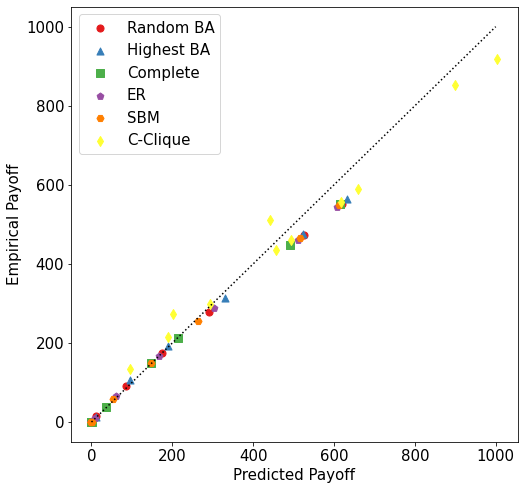

In [51]:
def ccdp(f_c):
    return 25*f_c*(f_c*N + N + 2)

c=sns.color_palette('Set1',len(names))
marker=['o','^','s','p','H','d','*']
fig = plt.figure(figsize=(8,8))
plt.plot(np.linspace(0,1000),np.linspace(0,1000),'k:')
for j in range(len(names)):
    plt.scatter(ccdp(np.array(cooperator_tmeans[j])),payoff_tmeans[j],color=c[j],
             marker=marker[j],label=names[j],s=50)
plt.legend()

# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([1,1000])
# plt.ylim([1,1000])

plt.ylabel("Empirical Payoff")
plt.xlabel("Predicted Payoff")

In [38]:
np.unique(payoff_tmeans)

array([0.00000e+00, 2.75000e-01, 1.17500e+00, 9.22500e+00, 1.26250e+01,
       1.42500e+01, 3.87500e+01, 5.78250e+01, 6.48750e+01, 9.14500e+01,
       1.07150e+02, 1.33750e+02, 1.48175e+02, 1.48650e+02, 1.67800e+02,
       1.73600e+02, 1.91500e+02, 2.12050e+02, 2.16225e+02, 2.54425e+02,
       2.73650e+02, 2.77900e+02, 2.89075e+02, 2.99750e+02, 3.14975e+02,
       4.35075e+02, 4.48075e+02, 4.59525e+02, 4.59575e+02, 4.65625e+02,
       4.72975e+02, 4.74750e+02, 5.10800e+02, 5.43275e+02, 5.48850e+02,
       5.50350e+02, 5.50875e+02, 5.56025e+02, 5.64600e+02, 5.90300e+02,
       8.51750e+02, 9.17950e+02])

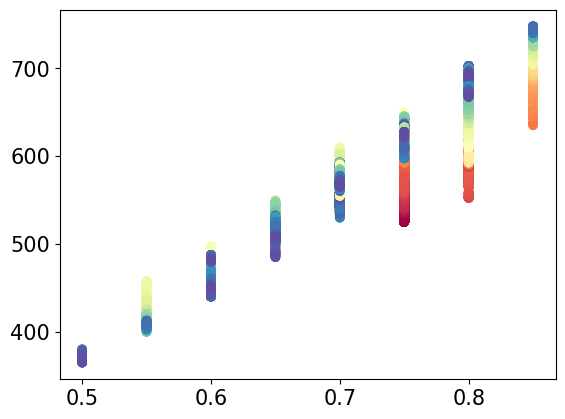

In [125]:
file = 'Data/Imitate/Experiment 2/C-Clique/'
payoff = pd.read_csv(file + 'payoff_100.csv',header=None).to_numpy()
cooperator = pd.read_csv(file + 'cooperator_100.csv',header=None).to_numpy()
for i in range(100):
    plt.scatter(cooperator[i,:],payoff[i,:],c=np.linspace(0,1,5*int(T)+1),cmap='Spectral')

# Final Networks

In [20]:
N = 20
T = int(N*(N-1)/2)
s = ['0.2','0.5','1','2','5','10','15','20','25','50','100']
names = ['Random BA','Highest BA','Complete','ER','SBM','C-Clique']
# payoff_tmeans = [[pd.read_csv('Data/Imitate/'+names[j]+'/'+s[i]+'.csv',header=None).to_numpy()[:,:int(T)].mean() 
#                   for i in range(len(s))] for j in range(len(names))]

extra = ''#v0208_'
period = range(4*T,5*T+1)#5*T#list(range(4*T,5*T+1))
imitate = 'Imitate'

payoff = [[pd.read_csv('Data/'+imitate+'/Experiment 2/'+names[j]+'/payoff_'+extra+s[i]+'.csv',header=None).to_numpy()[:,period] 
                  for i in range(len(s))] for j in range(len(names))]
cooperator = [[pd.read_csv('Data/'+imitate+'/Experiment 2/'+names[j]+'/cooperator_'+extra+s[i]+'.csv',header=None).to_numpy()[:,period] 
                  for i in range(len(s))] for j in range(len(names))]

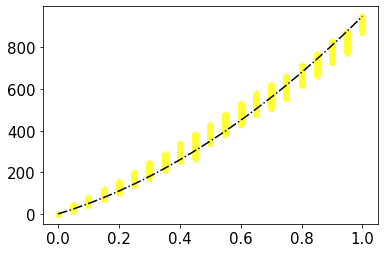

In [21]:
c=sns.color_palette('Set1',len(names))
marker=['o','^','s','p','H','d','*']
# for i in range(len(names)):
i=-1
plt.scatter(cooperator[i][:],payoff[i][:],color=c[i],marker=marker[i])
f_c = np.linspace(0,1)
f_p = 25*f_c*(f_c*N+N-2)
plt.plot(f_c,f_p,'k-.')

In [32]:
f_c_emp = np.unique(cooperator)
flat_payoff = [np.array(payoff[j]).flatten() for j in range(len(names))]
flat_cooperator = [np.array(cooperator[j]).flatten() for j in range(len(names))]

In [63]:
len(np.unique(flat_cooperator[0]))

20

In [103]:
payoff_c = [[flat_payoff[j][flat_cooperator[j]==c] for c in np.unique(flat_cooperator[j])] 
            for j in range(len(names))]
cooperator_c = [np.unique(flat_cooperator[j]) for j in range(len(names))]
payoff_c_mean = [[payoff_c[j][i].mean() for i in range(len(cooperator_c[j]))] for j in range(len(names))]
payoff_c_std = [[payoff_c[j][i].std() for i in range(len(cooperator_c[j]))] for j in range(len(names))]
payoff_shifted_c_std = [[np.std(payoff_c[j][i] - 25*cooperator_c[j][i]*(cooperator_c[j][i]*N+N-2)) 
                        for i in range(len(cooperator_c[j]))] for j in range(len(names))]

Text(0.5, 0, 'Fraction of Cooperators $<C>_t$')

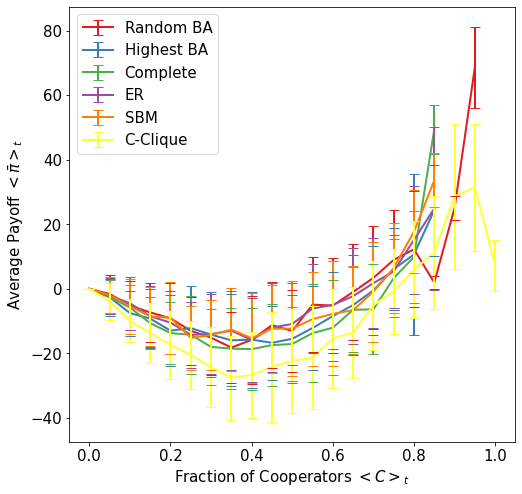

In [105]:
# plt.style.use('default')
c=sns.color_palette('Set1',len(names))
marker=['o','^','s','p','H','d','*']
fig = plt.figure(figsize=(8,8))
for j in range(len(names)):
# j=0
# plt.scatter(cooperator_c[j],payoff_c_mean[j],color=c[j],
#              marker=marker[j],label=names[j],s=50)
    f_p = 25*cooperator_c[j]*(cooperator_c[j]*N+N-2)
    plt.errorbar(cooperator_c[j],f_p-payoff_c_mean[j],yerr=payoff_shifted_c_std[j],color=c[j],
             label=names[j],capsize=5,barsabove=True,lw=2)
plt.legend()

# f_c = np.linspace(0,1)
# f_p = 25*f_c*(f_c*N+N-2)
# plt.plot(f_c,f_p,'k-.')
# plt.xscale('log')
# plt.gca().xaxis.set_major_formatter(ScalarFormatter())
# plt.yscale('log')
# plt.xlabel(r"Timescale Ratio $\tau_s/\tau_g$")

plt.ylabel(r"Average Payoff $<\bar{\pi}>_t$")
plt.xlabel(r"Fraction of Cooperators $<C>_t$")

# Comparing Imitate-p and Imitate-f

In [9]:
im_p = pd.read_csv('Data/Imitate/Experiment 2/ER/payoff_1.csv',header=None).to_numpy()
im_f1 = pd.read_csv('Data/Imitate2/Experiment 2/ER/payoff_v0208_1.csv',header=None).to_numpy()
im_f2 = pd.read_csv('Data/Imitate2/Experiment 2/ER/payoff_1.csv',header=None).to_numpy()

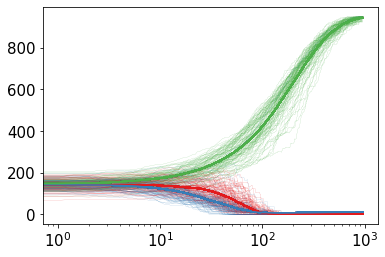

In [25]:
c = sns.color_palette('Set1',3)
l = ['Imitate-p',r'Imitate-f, $v=(0.2,0.8)$',r'Imitate-f, $v=(0.5,0.8)$']
T = 20*19/2
for i in range(100):
    plt.plot(np.arange(im_p.shape[1]),im_p[i,:],c=c[0],lw=0.1)
    plt.plot(np.arange(im_p.shape[1]),im_f1[i,:],c=c[1],lw=0.1)
    plt.plot(np.arange(im_p.shape[1]),im_f2[i,:],c=c[2],lw=0.1)
    plt.plot(np.arange(im_p.shape[1]),im_p.mean(axis=0),c=c[0])
    plt.plot(np.arange(im_p.shape[1]),im_f1.mean(axis=0),c=c[1])
    plt.plot(np.arange(im_p.shape[1]),im_f2.mean(axis=0),c=c[2])
    plt.xscale('log')
#     plt.yscale('log')

In [13]:
im_p.shape[1]

951